<a href="https://colab.research.google.com/github/wahyudi0018/ML_Ganjil_2024/blob/main/UTS_ANN_Kelompok6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| NAMA | NIM | Absen |
| ----------| :-----------: | :---------:|
| Eddo Dava Alfarisi | 2241720232 | 07 |
| Fanesabhirawaning Sulistyo | 2141720027 |  10 |
| Lintang Aprillya Sari | 2241720231 | 13 |
| Wahyudi | 2241720018 |  26 |

[Link Google Colab Klik Disini](https://colab.research.google.com/drive/1Pl9OWfeXFvK0PP7CGs2piqKcc_TyKVyL?usp=sharing
)

In [ ]:
#@title **Import kagglehub**
import kagglehub

# Download latest version
ntl0601_casia_webface_path = kagglehub.dataset_download('ntl0601/casia-webface')

print("Path to dataset files:", ntl0601_casia_webface_path)

Download already complete (2720283721 bytes).
Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1


### Penjelasan Kode:

- **Impor Library**:
  - `import kagglehub`: Mengimpor library `kagglehub` untuk mengunduh dataset langsung dari Kaggle.

- **Unduh Dataset**:
  - `ntl0601_casia_webface_path = kagglehub.dataset_download('ntl0601/casia-webface')`: Mengunduh dataset Casia-Webface dan menyimpan jalur lokasi dataset ke dalam variabel `ntl0601_casia_webface_path`.

- **Tampilkan Jalur Dataset**:
  - `print("Path to dataset files:", ntl0601_casia_webface_path)`: Mencetak jalur lokasi dataset yang telah diunduh untuk memastikan akses mudah ke file dataset.

In [ ]:
#@title Import Library dan Persiapan Konfigurasi
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Konfigurasi
DATASET_PATH = '/root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1/casia-webface'
BATCH_SIZE = 32
TARGET_SIZE = (128, 128)

### Penjelasan Kode:

- **Impor Library**:
  - `import os`: Mengimpor modul `os` untuk berinteraksi dengan sistem file dan mengelola direktori.
  - `import numpy as np`: Mengimpor library NumPy untuk operasi numerik, terutama untuk array dan manipulasi data.
  - `from PIL import Image`: Mengimpor kelas `Image` dari library Pillow (PIL) untuk memanipulasi dan memproses gambar.
  - `from sklearn.preprocessing import LabelEncoder`: Mengimpor `LabelEncoder` dari scikit-learn untuk mengubah label kategori menjadi format numerik.

- **Konfigurasi**:
  - `DATASET_PATH = '/root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1/casia-webface'`: Menetapkan jalur ke dataset Casia-Webface yang telah diunduh.
  - `BATCH_SIZE = 32`: Menentukan ukuran batch untuk pemrosesan data saat melatih model, membantu dalam pengelolaan memori.
  - `TARGET_SIZE = (128, 128)`: Menetapkan ukuran target untuk gambar, memastikan semua gambar memiliki dimensi yang sama saat diproses.

In [ ]:
def prepare_data(dataset_path):
    image_paths = []
    labels = []

    print("Memulai pengumpulan path dan label...")
    for person in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person)
        if os.path.isdir(person_path):
            for image_name in os.listdir(person_path):
                image_paths.append(os.path.join(person_path, image_name))
                labels.append(person)

    print(f"Total gambar ditemukan: {len(image_paths)}")
    return image_paths, labels

# Jalankan persiapan data
image_paths, labels = prepare_data(DATASET_PATH)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Informasi dataset
print(f"Jumlah kelas unik: {len(np.unique(encoded_labels))}")
print(f"Steps per epoch: {len(image_paths) // BATCH_SIZE}")

Memulai pengumpulan path dan label...
Total gambar ditemukan: 490623
Jumlah kelas unik: 10572
Steps per epoch: 15331


### Penjelasan Kode:

- **Fungsi `prepare_data`**:
  - `def prepare_data(dataset_path)`: Mendefinisikan fungsi untuk mempersiapkan data dengan mengambil jalur gambar dan label dari dataset.
  
- **Inisialisasi List**:
  - `image_paths = []`: Membuat list kosong untuk menyimpan jalur ke gambar.
  - `labels = []`: Membuat list kosong untuk menyimpan label yang sesuai dengan gambar.

- **Pengumpulan Jalur dan Label**:
  - `print("Memulai pengumpulan path dan label...")`: Menampilkan pesan untuk menunjukkan bahwa proses pengumpulan jalur dan label dimulai.
  - `for person in os.listdir(dataset_path)`: Iterasi melalui setiap sub-folder (nama orang) di dalam dataset.
    - `person_path = os.path.join(dataset_path, person)`: Menggabungkan jalur dataset dengan nama folder orang.
    - `if os.path.isdir(person_path)`: Memeriksa apakah jalur tersebut adalah direktori.
      - `for image_name in os.listdir(person_path)`: Iterasi melalui setiap gambar dalam folder orang.
        - `image_paths.append(os.path.join(person_path, image_name))`: Menambahkan jalur gambar lengkap ke list `image_paths`.
        - `labels.append(person)`: Menambahkan label (nama orang) yang sesuai ke list `labels`.

- **Informasi Gambar**:
  - `print(f"Total gambar ditemukan: {len(image_paths)}")`: Mencetak jumlah total gambar yang ditemukan dalam dataset.
  - `return image_paths, labels`: Mengembalikan list jalur gambar dan label ke pemanggil fungsi.

- **Jalankan Persiapan Data**:
  - `image_paths, labels = prepare_data(DATASET_PATH)`: Memanggil fungsi `prepare_data` untuk mengumpulkan jalur gambar dan label dari dataset dan menyimpannya dalam variabel.

- **Encode Labels**:
  - `label_encoder = LabelEncoder()`: Membuat instance dari `LabelEncoder`.
  - `encoded_labels = label_encoder.fit_transform(labels)`: Mengonversi label kategori menjadi format numerik yang dapat digunakan untuk pelatihan model.

- **Informasi Dataset**:
  - `print(f"Jumlah kelas unik: {len(np.unique(encoded_labels))}")`: Mencetak jumlah kelas unik dalam dataset yang telah dienkode.
  - `print(f"Steps per epoch: {len(image_paths) // BATCH_SIZE}")`: Menghitung dan mencetak jumlah langkah (steps) per epoch berdasarkan jumlah gambar dan ukuran batch yang ditentukan.

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode labels untuk stratifikasi
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tentukan jumlah target gambar per kelas
samples_per_class = 10

# Stratified sampling
sampled_image_paths = []
sampled_labels = []

for class_label in np.unique(encoded_labels):
    class_indices = np.where(encoded_labels == class_label)[0]

    # Ambil tepat 10 gambar per kelas jika tersedia, atau semua jika kurang
    if len(class_indices) >= samples_per_class:
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
    else:
        selected_indices = class_indices

    # Tambahkan ke daftar hasil sampling
    sampled_image_paths.extend([image_paths[i] for i in selected_indices])
    sampled_labels.extend([labels[i] for i in selected_indices])

# Konversi kembali sampled_labels ke format encoded
sampled_encoded_labels = label_encoder.transform(sampled_labels)

print(f"Total sampled images: {len(sampled_image_paths)}")
print(f"Total unique classes: {len(np.unique(sampled_encoded_labels))}")


Total sampled images: 105631
Total unique classes: 10572


### Penjelasan Kode:

- **Import Library**:
  - `import numpy as np`: Mengimpor library NumPy untuk manipulasi array dan operasi numerik.
  - `from sklearn.preprocessing import LabelEncoder`: Mengimpor `LabelEncoder` untuk mengonversi label kategori menjadi format numerik.

- **Encode Labels**:
  - `label_encoder = LabelEncoder()`: Membuat instance dari `LabelEncoder` untuk mempersiapkan pengkodean label.
  - `encoded_labels = label_encoder.fit_transform(labels)`: Mengonversi label kategori menjadi format numerik menggunakan `LabelEncoder`.

- **Tentukan Jumlah Target Gambar per Kelas**:
  - `samples_per_class = 10`: Menetapkan jumlah gambar yang ingin diambil dari setiap kelas.

- **Inisialisasi List untuk Sampling**:
  - `sampled_image_paths = []`: Membuat list kosong untuk menyimpan jalur gambar yang terpilih melalui sampling.
  - `sampled_labels = []`: Membuat list kosong untuk menyimpan label yang sesuai dengan gambar yang terpilih.

- **Stratified Sampling**:
  - `for class_label in np.unique(encoded_labels)`: Iterasi melalui setiap kelas unik dalam label yang telah dienkode.
    - `class_indices = np.where(encoded_labels == class_label)[0]`: Mengambil indeks gambar yang sesuai dengan kelas saat ini.
  
    - **Pemilihan Gambar**:
      - `if len(class_indices) >= samples_per_class`: Memeriksa apakah jumlah gambar untuk kelas saat ini mencukupi.
        - `selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)`: Mengambil 10 gambar secara acak dari kelas jika jumlahnya mencukupi.
      - `else`: Jika jumlah gambar kurang dari yang ditargetkan,
        - `selected_indices = class_indices`: Mengambil semua gambar yang tersedia dari kelas tersebut.
    
    - **Tambahkan Hasil Sampling**:
      - `sampled_image_paths.extend([image_paths[i] for i in selected_indices])`: Menambahkan jalur gambar yang terpilih ke list `sampled_image_paths`.
      - `sampled_labels.extend([labels[i] for i in selected_indices])`: Menambahkan label yang sesuai ke list `sampled_labels`.

- **Konversi Kembali ke Format Encoded**:
  - `sampled_encoded_labels = label_encoder.transform(sampled_labels)`: Mengonversi label yang terpilih kembali ke format encoded menggunakan `LabelEncoder`.

- **Informasi Sampling**:
  - `print(f"Total sampled images: {len(sampled_image_paths)}")`: Mencetak jumlah total gambar yang diambil melalui sampling.
  - `print(f"Total unique classes: {len(np.unique(sampled_encoded_labels))}")`: Mencetak jumlah kelas unik dalam gambar yang telah diambil melalui sampling.

In [ ]:
import numpy as np
from PIL import Image

def load_and_preprocess_image(image_path, target_size):
    """Fungsi untuk memuat dan preprocess gambar sebagai grayscale"""
    try:
        # Buka gambar dan ubah ke grayscale
        img = Image.open(image_path).convert('L')  # 'L' mode untuk grayscale
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalisasi ke rentang [0, 1]

        # Tambahkan satu channel tambahan untuk mencocokkan format (height, width, 1)
        img_array = np.expand_dims(img_array, axis=-1)
        return img_array
    except Exception as e:
        print(f"Error memuat gambar {image_path}: {e}")
        return None

def image_data_generator(image_paths, labels, batch_size, target_size):
    """Generator untuk memuat dan memproses gambar dalam batch secara efisien"""
    num_images = len(image_paths)
    indices = np.arange(num_images)

    while True:
        # Mengacak urutan gambar di setiap epoch
        np.random.shuffle(indices)

        for start in range(0, num_images, batch_size):
            end = min(start + batch_size, num_images)
            batch_indices = indices[start:end]

            # Menyiapkan batch data
            batch_images = []
            batch_labels = []
            for i in batch_indices:
                image_path = image_paths[i]
                label = labels[i]

                # Load dan preprocess setiap gambar
                img = load_and_preprocess_image(image_path, target_size)
                if img is not None:
                    batch_images.append(img)
                    batch_labels.append(label)

            # Pastikan batch_images menjadi array numpy sebelum digunakan
            batch_images = np.array(batch_images, dtype=np.float32)
            batch_labels = np.array(batch_labels, dtype=np.int32)

            yield batch_images, batch_labels

# Contoh pemakaian generator dengan data yang sudah disampling
batch_size = 32
TARGET_SIZE = (128, 128)  # Atur ukuran target gambar sesuai kebutuhan

data_generator = image_data_generator(sampled_image_paths, sampled_encoded_labels, batch_size, TARGET_SIZE)

# Mengambil satu batch untuk memastikan semuanya berfungsi
batch_images, batch_labels = next(data_generator)
print(f"Bentuk batch gambar: {batch_images.shape}")  # Harus berupa (batch_size, height, width, 1)
print(f"Bentuk batch label: {batch_labels.shape}")


Bentuk batch gambar: (32, 128, 128, 1)
Bentuk batch label: (32,)


### Penjelasan Kode:

- **Import Library**:
  - `import numpy as np`: Mengimpor library NumPy untuk manipulasi array dan operasi numerik.
  - `from PIL import Image`: Mengimpor modul `Image` dari library Pillow untuk memproses gambar.

- **Fungsi `load_and_preprocess_image`**:
  - `def load_and_preprocess_image(image_path, target_size)`: Mendefinisikan fungsi untuk memuat dan memproses gambar menjadi format grayscale.
  
  - **Membuka dan Mengubah Gambar**:
    - `img = Image.open(image_path).convert('L')`: Membuka gambar dari jalur yang diberikan dan mengonversinya ke mode grayscale ('L').
    - `img = img.resize(target_size)`: Mengubah ukuran gambar menjadi ukuran target yang ditentukan.

  - **Normalisasi**:
    - `img_array = np.array(img) / 255.0`: Mengonversi gambar ke array NumPy dan menormalkannya ke rentang [0, 1].

  - **Menambahkan Channel Tambahan**:
    - `img_array = np.expand_dims(img_array, axis=-1)`: Menambahkan dimensi baru untuk mencocokkan format gambar menjadi (height, width, 1), yang diperlukan untuk input ke model.

  - **Error Handling**:
    - `except Exception as e`: Menangani kesalahan yang mungkin terjadi saat membuka atau memproses gambar.
    - `print(f"Error memuat gambar {image_path}: {e}")`: Menampilkan pesan kesalahan jika terjadi.
    - `return None`: Mengembalikan None jika terjadi kesalahan.

- **Fungsi `image_data_generator`**:
  - `def image_data_generator(image_paths, labels, batch_size, target_size)`: Mendefinisikan generator untuk memuat dan memproses gambar dalam batch.
  
  - **Inisialisasi**:
    - `num_images = len(image_paths)`: Menyimpan jumlah total gambar yang tersedia.
    - `indices = np.arange(num_images)`: Membuat array indeks untuk gambar.

  - **Looping Tak Terbatas**:
    - `while True`: Membuat loop tak terbatas untuk menghasilkan batch data secara terus-menerus.

  - **Mengacak Urutan Gambar**:
    - `np.random.shuffle(indices)`: Mengacak urutan indeks gambar di setiap epoch.

  - **Pengambilan Batch**:
    - `for start in range(0, num_images, batch_size)`: Iterasi untuk mengambil batch gambar.
      - `end = min(start + batch_size, num_images)`: Menentukan indeks akhir untuk batch saat ini.
      - `batch_indices = indices[start:end]`: Mengambil indeks gambar untuk batch saat ini.

    - **Menyiapkan Batch Data**:
      - `batch_images = []`: Inisialisasi list untuk menyimpan gambar dalam batch.
      - `batch_labels = []`: Inisialisasi list untuk menyimpan label dalam batch.
      - `for i in batch_indices`: Iterasi untuk setiap indeks gambar dalam batch.
        - `image_path = image_paths[i]`: Mendapatkan jalur gambar dari list.
        - `label = labels[i]`: Mendapatkan label yang sesuai dari list.
        - `img = load_and_preprocess_image(image_path, target_size)`: Memuat dan memproses gambar.
        - `if img is not None`: Memeriksa apakah gambar berhasil dimuat.
          - `batch_images.append(img)`: Menambahkan gambar ke list batch.
          - `batch_labels.append(label)`: Menambahkan label ke list batch.

    - **Konversi ke Array NumPy**:
      - `batch_images = np.array(batch_images, dtype=np.float32)`: Mengonversi list gambar menjadi array NumPy dengan tipe data float32.
      - `batch_labels = np.array(batch_labels, dtype=np.int32)`: Mengonversi list label menjadi array NumPy dengan tipe data int32.

    - **Menghasilkan Batch**:
      - `yield batch_images, batch_labels`: Menghasilkan batch gambar dan label untuk digunakan dalam pelatihan.

- **Contoh Penggunaan Generator**:
  - `data_generator = image_data_generator(sampled_image_paths, sampled_encoded_labels, batch_size, TARGET_SIZE)`: Membuat instance generator untuk data yang sudah disampling.
  
  - **Mengambil Satu Batch**:
  - `batch_images, batch_labels = next(data_generator)`: Mengambil satu batch dari generator.
  - `print(f"Bentuk batch gambar: {batch_images.shape}")`: Menampilkan bentuk array gambar, yang diharapkan berupa (batch_size, height, width, 1).
  - `print(f"Bentuk batch label: {batch_labels.shape}")`: Menampilkan bentuk array label.

In [ ]:
import numpy as np

def cek_grayscale(batch_images):
    """
    Fungsi untuk mengecek status grayscale dari batch gambar
    Args:
        batch_images: numpy array dari batch gambar
    """
    print("\nHasil Pengecekan Grayscale:")
    print(f"Bentuk batch: {batch_images.shape}")

    # Cek dimensi
    if len(batch_images.shape) != 4:
        print("Error: Format batch tidak sesuai, seharusnya (batch_size, height, width, channels)")
        return

    # Cek channel
    if batch_images.shape[-1] != 1:
        print("Error: Jumlah channel bukan 1 (bukan grayscale)")
        return

    # Cek range nilai (seharusnya 0-1 karena sudah dinormalisasi)
    nilai_min = np.min(batch_images)
    nilai_max = np.max(batch_images)
    print(f"Range nilai pixel: {nilai_min:.3f} sampai {nilai_max:.3f}")

    # Cek apakah benar-benar grayscale (tidak ada variasi antar channel)
    is_grayscale = True
    for img in batch_images:
        if img.shape[-1] != 1:
            is_grayscale = False
            break

    print(f"Status Grayscale: {'✓ Ya' if is_grayscale else '✗ Tidak'}")
    print(f"Jumlah gambar dalam batch: {len(batch_images)}")

# Gunakan fungsi untuk batch yang sudah ada
cek_grayscale(batch_images)


Hasil Pengecekan Grayscale:
Bentuk batch: (32, 128, 128, 1)
Range nilai pixel: 0.000 sampai 1.000
Status Grayscale: ✓ Ya
Jumlah gambar dalam batch: 32


### Penjelasan Kode:

- **Import Library**:
  - `import numpy as np`: Mengimpor library NumPy untuk manipulasi array dan operasi numerik.

- **Fungsi `cek_grayscale`**:
  - `def cek_grayscale(batch_images)`: Mendefinisikan fungsi untuk memeriksa apakah batch gambar dalam format grayscale.
  
  - **Argumen**:
    - `batch_images`: Numpy array yang berisi batch gambar.

  - **Cetak Informasi**:
    - `print("\nHasil Pengecekan Grayscale:")`: Menampilkan judul untuk hasil pengecekan.
    - `print(f"Bentuk batch: {batch_images.shape}")`: Menampilkan bentuk array batch gambar.

  - **Cek Dimensi**:
    - `if len(batch_images.shape) != 4`: Memeriksa apakah batch gambar memiliki 4 dimensi (batch_size, height, width, channels).
      - `print("Error: Format batch tidak sesuai, seharusnya (batch_size, height, width, channels)")`: Menampilkan pesan kesalahan jika format tidak sesuai.
      - `return`: Menghentikan eksekusi fungsi jika format tidak sesuai.

  - **Cek Channel**:
    - `if batch_images.shape[-1] != 1`: Memeriksa apakah jumlah channel pada gambar adalah 1 (menunjukkan grayscale).
      - `print("Error: Jumlah channel bukan 1 (bukan grayscale)")`: Menampilkan pesan kesalahan jika channel bukan 1.
      - `return`: Menghentikan eksekusi fungsi jika channel tidak sesuai.

  - **Cek Rentang Nilai**:
    - `nilai_min = np.min(batch_images)`: Menghitung nilai pixel minimum dalam batch gambar.
    - `nilai_max = np.max(batch_images)`: Menghitung nilai pixel maksimum dalam batch gambar.
    - `print(f"Range nilai pixel: {nilai_min:.3f} sampai {nilai_max:.3f}")`: Menampilkan rentang nilai pixel yang ditemukan.

  - **Cek Grayscale**:
    - `is_grayscale = True`: Inisialisasi variabel untuk menandakan apakah semua gambar adalah grayscale.
    - `for img in batch_images`: Iterasi melalui setiap gambar dalam batch.
      - `if img.shape[-1] != 1`: Memeriksa jumlah channel untuk setiap gambar.
        - `is_grayscale = False`: Menandai bahwa ada gambar yang bukan grayscale.
        - `break`: Menghentikan iterasi jika gambar bukan grayscale.

  - **Cetak Hasil Pengecekan**:
    - `print(f"Status Grayscale: {'✓ Ya' if is_grayscale else '✗ Tidak'}")`: Menampilkan status apakah semua gambar adalah grayscale.
    - `print(f"Jumlah gambar dalam batch: {len(batch_images)}")`: Menampilkan jumlah gambar dalam batch.

- **Penggunaan Fungsi**:
  - `cek_grayscale(batch_images)`: Memanggil fungsi `cek_grayscale` dengan menggunakan batch gambar yang sudah ada.

In [ ]:
import numpy as np

def batch_generator(image_paths, labels, batch_size, target_size):
    """Generator untuk menghasilkan batch data dengan gambar grayscale"""
    while True:
        # Mengacak indeks
        indices = np.random.permutation(len(image_paths))

        for start_idx in range(0, len(indices), batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]

            batch_images = []
            batch_labels = []

            for idx in batch_indices:
                # Memuat dan preprocess gambar sebagai grayscale
                img = load_and_preprocess_image(image_paths[idx], target_size)
                if img is not None:
                    batch_images.append(img)
                    batch_labels.append(labels[idx])

            if batch_images:  # Hanya yield jika ada gambar valid
                # Pastikan batch_images dan batch_labels berbentuk array numpy sebelum di-yield
                yield np.array(batch_images, dtype=np.float32), np.array(batch_labels, dtype=np.int32)

# Menguji generator dengan data yang sudah disampling
BATCH_SIZE = 32
TARGET_SIZE = (128, 128)  # Atur ukuran target gambar sesuai kebutuhan

generator = batch_generator(sampled_image_paths, sampled_encoded_labels, BATCH_SIZE, TARGET_SIZE)
batch_images, batch_labels = next(generator)

print("Informasi batch:")
print(f"Bentuk batch gambar: {batch_images.shape}")  # Harus berupa (BATCH_SIZE, height, width, 1)
print(f"Bentuk batch label: {batch_labels.shape}")
print(f"Label dalam batch: {batch_labels}")


Informasi batch:
Bentuk batch gambar: (32, 128, 128, 1)
Bentuk batch label: (32,)
Label dalam batch: [ 5546  7813  8575  8186   582  8246  4829  5354  6982  9223  7349  8010
  2796  1639  1150  4700  9948  9918  6392  6721 10229  1717  8967  4348
  9044  6909   857  4534  2243  3614  7281  5204]


### Penjelasan Kode:

- **Import Library**:
  - `import numpy as np`: Mengimpor library NumPy untuk manipulasi array dan operasi numerik.

- **Fungsi `batch_generator`**:
  - `def batch_generator(image_paths, labels, batch_size, target_size)`: Mendefinisikan fungsi generator untuk menghasilkan batch data dengan gambar grayscale.
  
  - **Argumen**:
    - `image_paths`: Daftar path gambar.
    - `labels`: Daftar label yang sesuai untuk setiap gambar.
    - `batch_size`: Ukuran batch yang ingin dihasilkan.
    - `target_size`: Ukuran target gambar untuk preprocessing.

  - **Loop Tak Terhingga**:
    - `while True`: Memungkinkan generator untuk menghasilkan batch secara terus-menerus.

  - **Mengacak Indeks**:
    - `indices = np.random.permutation(len(image_paths))`: Mengacak indeks gambar untuk memastikan variasi dalam batch setiap epoch.

  - **Membagi Menjadi Batch**:
    - `for start_idx in range(0, len(indices), batch_size)`: Mengulangi untuk setiap batch berdasarkan ukuran batch.
      - `batch_indices = indices[start_idx:start_idx + batch_size]`: Mengambil indeks untuk batch saat ini.

  - **Menyiapkan Data untuk Batch**:
    - `batch_images = []` dan `batch_labels = []`: Membuat list kosong untuk menampung gambar dan label dalam batch saat ini.

    - `for idx in batch_indices`: Iterasi melalui indeks gambar dalam batch.
      - `img = load_and_preprocess_image(image_paths[idx], target_size)`: Memuat dan memproses gambar sebagai grayscale menggunakan fungsi `load_and_preprocess_image`.
      - `if img is not None`: Memastikan gambar valid.
        - `batch_images.append(img)`: Menambahkan gambar ke list batch_images.
        - `batch_labels.append(labels[idx])`: Menambahkan label yang sesuai ke list batch_labels.

  - **Yield Batch**:
    - `if batch_images`: Memastikan ada gambar yang valid sebelum menghasilkan batch.
      - `yield np.array(batch_images, dtype=np.float32), np.array(batch_labels, dtype=np.int32)`: Menghasilkan batch gambar dan label sebagai array NumPy dengan tipe data yang sesuai.

- **Menggunakan Generator**:
  - `generator = batch_generator(sampled_image_paths, sampled_encoded_labels, BATCH_SIZE, TARGET_SIZE)`: Membuat instance generator dengan data yang sudah disampling.
  
  - **Mengambil Satu Batch**:
    - `batch_images, batch_labels = next(generator)`: Mengambil satu batch dari generator.

  - **Cetak Informasi Batch**:
    - `print("Informasi batch:")`: Menampilkan informasi tentang batch yang dihasilkan.
    - `print(f"Bentuk batch gambar: {batch_images.shape}")`: Menampilkan bentuk array gambar (seharusnya `(BATCH_SIZE, height, width, 1)`).
    - `print(f"Bentuk batch label: {batch_labels.shape}")`: Menampilkan bentuk array label.
    - `print(f"Label dalam batch: {batch_labels}")`: Menampilkan label yang terdapat dalam batch.

In [ ]:
def test_multiple_batches(generator, num_batches=3):
    print(f"\nMengetes {num_batches} batch:")
    for i in range(num_batches):
        batch_images, batch_labels = next(generator)
        print(f"\nBatch {i+1}:")
        print(f"Bentuk gambar: {batch_images.shape}")
        print(f"Jumlah label unik dalam batch: {len(np.unique(batch_labels))}")

        # Clear memory setelah setiap batch
        del batch_images, batch_labels
        import gc
        gc.collect()

# Tes beberapa batch
test_multiple_batches(generator)


Mengetes 3 batch:

Batch 1:
Bentuk gambar: (32, 128, 128, 1)
Jumlah label unik dalam batch: 32

Batch 2:
Bentuk gambar: (32, 128, 128, 1)
Jumlah label unik dalam batch: 32

Batch 3:
Bentuk gambar: (32, 128, 128, 1)
Jumlah label unik dalam batch: 32


### Penjelasan Kode:

- **Fungsi `test_multiple_batches`**:
  - `def test_multiple_batches(generator, num_batches=3)`: Mendefinisikan fungsi untuk menguji generator dengan menghasilkan beberapa batch gambar dan label.
  
  - **Argumen**:
    - `generator`: Instance generator yang akan diuji.
    - `num_batches`: Jumlah batch yang ingin diuji (default: 3).

  - **Mencetak Informasi Awal**:
    - `print(f"\nMengetes {num_batches} batch:")`: Menampilkan pesan yang menunjukkan berapa banyak batch yang akan diuji.

  - **Loop untuk Mengambil Batch**:
    - `for i in range(num_batches)`: Mengulangi sebanyak `num_batches` untuk mengambil dan mencetak informasi tentang setiap batch.
      - `batch_images, batch_labels = next(generator)`: Mengambil batch gambar dan label dari generator.

  - **Menampilkan Informasi Batch**:
    - `print(f"\nBatch {i+1}:")`: Menampilkan nomor batch yang sedang diproses.
    - `print(f"Bentuk gambar: {batch_images.shape}")`: Menampilkan bentuk array gambar dari batch.
    - `print(f"Jumlah label unik dalam batch: {len(np.unique(batch_labels))}")`: Menghitung dan menampilkan jumlah label unik dalam batch.

  - **Membersihkan Memori**:
    - `del batch_images, batch_labels`: Menghapus variabel `batch_images` dan `batch_labels` untuk membebaskan memori.
    - `import gc`: Mengimpor modul `gc` untuk pengelolaan memori.
    - `gc.collect()`: Memanggil garbage collector untuk membersihkan objek yang tidak lagi digunakan dari memori.

- **Menggunakan Fungsi untuk Menguji Batch**:
  - `test_multiple_batches(generator)`: Memanggil fungsi untuk menguji generator dengan mengambil beberapa batch dan menampilkan informasi terkait.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data dengan rasio 80:20
train_paths, val_paths, train_labels, val_labels = train_test_split(
    sampled_image_paths,
    sampled_encoded_labels,
    test_size=0.2,
    random_state=42,
    stratify=sampled_encoded_labels
)


# Cek distribusi kelas
print("\nDistribusi kelas:")
for class_label in np.unique(sampled_encoded_labels):
    train_count = np.sum(train_labels == class_label)
    val_count = np.sum(val_labels == class_label)
    print(f"Kelas {class_label}:")
    print(f"  Training: {train_count}")
    print(f"  Validasi: {val_count}")

Streaming output truncated to the last 5000 lines.
  Training: 8
  Validasi: 2
Kelas 8906:
  Training: 8
  Validasi: 2
Kelas 8907:
  Training: 8
  Validasi: 2
Kelas 8908:
  Training: 8
  Validasi: 2
Kelas 8909:
  Training: 8
  Validasi: 2
Kelas 8910:
  Training: 8
  Validasi: 2
Kelas 8911:
  Training: 8
  Validasi: 2
Kelas 8912:
  Training: 8
  Validasi: 2
Kelas 8913:
  Training: 8
  Validasi: 2
Kelas 8914:
  Training: 8
  Validasi: 2
Kelas 8915:
  Training: 8
  Validasi: 2
Kelas 8916:
  Training: 8
  Validasi: 2
Kelas 8917:
  Training: 8
  Validasi: 2
Kelas 8918:
  Training: 8
  Validasi: 2
Kelas 8919:
  Training: 8
  Validasi: 2
Kelas 8920:
  Training: 8
  Validasi: 2
Kelas 8921:
  Training: 8
  Validasi: 2
Kelas 8922:
  Training: 8
  Validasi: 2
Kelas 8923:
  Training: 8
  Validasi: 2
Kelas 8924:
  Training: 8
  Validasi: 2
Kelas 8925:
  Training: 8
  Validasi: 2
Kelas 8926:
  Training: 8
  Validasi: 2
Kelas 8927:
  Training: 8
  Validasi: 2
Kelas 8928:
  Training: 8
  Validasi: 2
K

### Penjelasan Kode:

- **Impor Modul**:
  - `from sklearn.model_selection import train_test_split`: Mengimpor fungsi `train_test_split` dari pustaka `scikit-learn` untuk membagi dataset menjadi set pelatihan dan validasi.

- **Pembagian Data**:
  - `train_paths, val_paths, train_labels, val_labels = train_test_split(...)`: Menggunakan fungsi `train_test_split` untuk membagi data gambar dan label menjadi dua subset: satu untuk pelatihan (train) dan satu untuk validasi (validation).
    - **Argumen**:
      - `sampled_image_paths`: Daftar jalur gambar yang telah diambil sampelnya.
      - `sampled_encoded_labels`: Label yang telah di-encode dari gambar.
      - `test_size=0.2`: Menentukan proporsi data yang digunakan untuk set validasi (20% dari total data).
      - `random_state=42`: Menetapkan seed untuk menghasilkan hasil yang konsisten dan dapat direproduksi.
      - `stratify=sampled_encoded_labels`: Menggunakan stratifikasi untuk memastikan bahwa proporsi kelas dalam set pelatihan dan validasi sama dengan proporsi dalam dataset asli.

- **Cek Distribusi Kelas**:
  - `print("\nDistribusi kelas:")`: Menampilkan header untuk distribusi kelas.
  - `for class_label in np.unique(sampled_encoded_labels)`: Loop untuk setiap kelas unik yang terdapat dalam label yang telah di-encode.
    - `train_count = np.sum(train_labels == class_label)`: Menghitung jumlah contoh dalam set pelatihan untuk kelas tertentu.
    - `val_count = np.sum(val_labels == class_label)`: Menghitung jumlah contoh dalam set validasi untuk kelas tertentu.
    - `print(f"Kelas {class_label}:")`: Menampilkan informasi tentang kelas saat ini.
    - `print(f"  Training: {train_count}")`: Menampilkan jumlah contoh dalam set pelatihan untuk kelas tersebut.
    - `print(f"  Validasi: {val_count}")`: Menampilkan jumlah contoh dalam set validasi untuk kelas tersebut.

In [ ]:
# Tampilkan informasi hasil split
print("Informasi Split Data:")
print(f"Total data: {len(sampled_image_paths)}")
print(f"Jumlah data training: {len(train_paths)}")
print(f"Jumlah data validasi: {len(val_paths)}")
print(f"Jumlah kelas unik di training: {len(np.unique(train_labels))}")
print(f"Jumlah kelas unik di validasi: {len(np.unique(val_labels))}")

Informasi Split Data:
Total data: 105631
Jumlah data training: 84504
Jumlah data validasi: 21127
Jumlah kelas unik di training: 10572
Jumlah kelas unik di validasi: 10571


### Penjelasan Kode:

- **Tampilkan Informasi Split Data**:
  - `print("Informasi Split Data:")`: Menampilkan header untuk informasi tentang hasil pemisahan data.
  - `print(f"Total data: {len(sampled_image_paths)}")`: Menampilkan total jumlah data gambar yang telah diambil sampelnya.
  - `print(f"Jumlah data training: {len(train_paths)}")`: Menampilkan jumlah data gambar yang digunakan untuk pelatihan.
  - `print(f"Jumlah data validasi: {len(val_paths)}")`: Menampilkan jumlah data gambar yang digunakan untuk validasi.
  - `print(f"Jumlah kelas unik di training: {len(np.unique(train_labels))}")`: Menampilkan jumlah kelas unik yang ada dalam set pelatihan.
  - `print(f"Jumlah kelas unik di validasi: {len(np.unique(val_labels))}")`: Menampilkan jumlah kelas unik yang ada dalam set validasi.

In [ ]:
from skimage.feature import hog, local_binary_pattern
from sklearn.preprocessing import StandardScaler
import gc
import os
import pickle

### Penjelasan Kode:

- **Import Libraries**:
  - `from skimage.feature import hog, local_binary_pattern`: Mengimpor fungsi HOG (Histogram of Oriented Gradients) dan Local Binary Pattern (LBP) dari `skimage` untuk ekstraksi fitur citra.
  - `from sklearn.preprocessing import StandardScaler`: Mengimpor `StandardScaler` dari scikit-learn untuk normalisasi fitur.
  - `import gc`: Mengimpor modul `gc` untuk pengelolaan memori, yang membantu membersihkan objek yang tidak lagi diperlukan.
  - `import os`: Mengimpor modul `os` untuk berinteraksi dengan sistem file (misalnya, mengelola path dan direktori).
  - `import pickle`: Mengimpor modul `pickle` untuk menyimpan dan memuat objek Python (seperti model atau data) ke dalam format biner.

In [ ]:
# Parameter HOG
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'visualize': False
}

# Parameter LBP
lbp_params = {
    'P': 8,  # jumlah point
    'R': 1,  # radius
    'method': 'uniform'
}

### Penjelasan Kode:

- **Parameter HOG**:
  - `hog_params`: Sebuah dictionary yang menyimpan parameter untuk ekstraksi fitur menggunakan HOG.
    - `'orientations': 9`: Menetapkan jumlah orientasi gradien yang digunakan.
    - `'pixels_per_cell': (8, 8)`: Ukuran sel dalam piksel untuk pembagian gambar.
    - `'cells_per_block': (2, 2)`: Jumlah sel per blok, digunakan untuk normalisasi.
    - `'visualize': False`: Menentukan apakah hasil visualisasi HOG harus ditampilkan atau tidak.

- **Parameter LBP**:
  - `lbp_params`: Sebuah dictionary yang menyimpan parameter untuk ekstraksi fitur menggunakan Local Binary Pattern (LBP).
    - `'P': 8`: Menentukan jumlah titik (pixel) di sekitar piksel pusat untuk perhitungan LBP.
    - `'R': 1`: Menentukan radius dari titik yang diambil.
    - `'method': 'uniform'`: Menetapkan metode LBP yang digunakan, di sini 'uniform' berarti hanya pola yang memiliki maksimum dua transisi antara 0 dan 1.

In [ ]:
def extract_hog_features(img, target_size):
    """Ekstrak fitur HOG dari satu gambar"""
    try:
        features = hog(img.reshape(target_size), **hog_params)
        return features
    except Exception as e:
        print(f"Error ekstraksi HOG: {e}")
        return None

def extract_lbp_features(img, target_size):
    """Ekstrak fitur LBP dari satu gambar"""
    try:
        # Konversi ke uint8 (0-255) sebelum LBP
        img_uint8 = (img.reshape(target_size) * 255).astype(np.uint8)

        lbp = local_binary_pattern(
            img_uint8,
            lbp_params['P'],
            lbp_params['R'],
            lbp_params['method']
        )
        # Hitung histogram LBP
        n_bins = lbp_params['P'] + 2
        hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
        # Normalisasi histogram
        hist = hist.astype("float") / (hist.sum() + 1e-7)
        return hist
    except Exception as e:
        print(f"Error ekstraksi LBP: {e}")
        return None

### Penjelasan Kode:

- **Fungsi `extract_hog_features`**:
  - Tujuan: Mengekstrak fitur Histogram of Oriented Gradients (HOG) dari sebuah gambar.
  - Input:
    - `img`: Gambar yang sudah diproses (grayscale dan dinormalisasi).
    - `target_size`: Ukuran target gambar untuk proses HOG.
  - Proses:
    - Mengubah bentuk gambar sesuai dengan `target_size`.
    - Menggunakan fungsi `hog` untuk mengekstrak fitur HOG dengan parameter yang telah ditentukan.
  - Output: Kembalikan fitur HOG yang diekstrak atau `None` jika terjadi kesalahan.

- **Fungsi `extract_lbp_features`**:
  - Tujuan: Mengekstrak fitur Local Binary Pattern (LBP) dari sebuah gambar.
  - Input:
    - `img`: Gambar yang sudah diproses (grayscale dan dinormalisasi).
    - `target_size`: Ukuran target gambar untuk proses LBP.
  - Proses:
    - Mengubah gambar menjadi tipe data `uint8` (0-255) sebelum menghitung LBP.
    - Menghitung pola biner lokal menggunakan parameter yang telah ditentukan.
    - Menghitung histogram dari hasil LBP.
    - Normalisasi histogram untuk mendapatkan distribusi fitur yang terstandarisasi.
  - Output: Kembalikan histogram LBP yang dinormalisasi atau `None` jika terjadi kesalahan.

In [ ]:
def process_and_save_features(data_generator, num_samples, save_path, target_size, batch_size=32):
    """
    Ekstrak dan simpan fitur dari generator data dengan optimasi memori
    """
    os.makedirs(save_path, exist_ok=True)
    processed_samples = 0
    batch_count = 0

    try:
        while processed_samples < num_samples:
            # Ambil batch dari generator
            batch_images, batch_labels = next(data_generator)
            batch_count += 1

            # Ekstrak fitur untuk batch
            hog_features = []
            lbp_features = []

            for img in batch_images:
                # Ekstrak HOG
                hog_feat = extract_hog_features(img, target_size)
                if hog_feat is not None:
                    hog_features.append(hog_feat)

                # Ekstrak LBP
                lbp_feat = extract_lbp_features(img, target_size)
                if lbp_feat is not None:
                    lbp_features.append(lbp_feat)

            # Konversi ke numpy array
            hog_features = np.array(hog_features)
            lbp_features = np.array(lbp_features)

            # Simpan fitur ke disk
            batch_features = {
                'hog': hog_features,
                'lbp': lbp_features,
                'labels': batch_labels
            }

            batch_filename = os.path.join(save_path, f'batch_{batch_count}.pkl')
            with open(batch_filename, 'wb') as f:
                pickle.dump(batch_features, f)

            processed_samples += len(batch_labels)

            # Bersihkan memori
            del batch_images, batch_labels, hog_features, lbp_features
            gc.collect()

            # Progress update
            print(f"\rProgress: {processed_samples}/{num_samples} samples processed", end='')

    except StopIteration:
        print("\nSelesai memproses semua sampel")

    return save_path

### Penjelasan Kode:

- **Fungsi `process_and_save_features`**:
  - **Tujuan**: Mengekstrak fitur HOG dan LBP dari gambar yang dihasilkan oleh generator data dan menyimpannya ke disk untuk mengoptimalkan penggunaan memori.
  
  - **Parameter**:
    - `data_generator`: Generator yang menghasilkan batch gambar dan label.
    - `num_samples`: Jumlah total sampel yang akan diproses.
    - `save_path`: Direktori tempat fitur yang diekstrak akan disimpan.
    - `target_size`: Ukuran target gambar untuk ekstraksi fitur.
    - `batch_size`: Ukuran batch (default 32).
  
  - **Proses**:
    1. **Membuat Direktori**: Memastikan direktori untuk menyimpan fitur ada atau membuatnya jika tidak ada.
    2. **Pengulangan Sampel**: Menggunakan loop `while` untuk memproses gambar sampai jumlah sampel yang ditentukan tercapai.
    3. **Mengambil Batch**: Mengambil batch gambar dan label dari generator.
    4. **Ekstraksi Fitur**:
       - Menggunakan fungsi `extract_hog_features` dan `extract_lbp_features` untuk mengekstrak fitur dari setiap gambar dalam batch.
       - Menyimpan hasil ekstraksi HOG dan LBP dalam list.
    5. **Menyimpan Fitur**:
       - Mengonversi list fitur HOG dan LBP ke dalam array NumPy.
       - Membuat dictionary yang menyimpan fitur dan label, lalu menyimpannya dalam file `.pkl` menggunakan `pickle`.
    6. **Bersihkan Memori**: Menghapus variabel yang tidak diperlukan untuk menghindari pemborosan memori dan menjalankan garbage collector.
    7. **Progress Update**: Menampilkan status pemrosesan di konsol.

  - **Output**: Mengembalikan `save_path`, lokasi di mana fitur yang diekstrak disimpan.

### Catatan:
Fungsi ini efisien dalam pengelolaan memori dan memungkinkan pemrosesan dataset besar dengan menghindari pemborosan sumber daya. Pastikan untuk menangani exception yang mungkin terjadi saat membuka atau menyimpan file.

In [ ]:
# Buat generator untuk data training dan validasi
def create_data_generators(train_paths, val_paths, train_labels, val_labels, batch_size, target_size):
    train_generator = image_data_generator(
        train_paths,
        train_labels,
        batch_size=batch_size,
        target_size=target_size
    )

    val_generator = image_data_generator(
        val_paths,
        val_labels,
        batch_size=batch_size,
        target_size=target_size
    )

    return train_generator, val_generator

# Inisialisasi generator
batch_size = 32
train_generator, val_generator = create_data_generators(
    train_paths,
    val_paths,
    train_labels,
    val_labels,
    batch_size,
    TARGET_SIZE
)

# Sekarang jalankan ekstraksi fitur
print("\nMemproses data training...")
train_features_path = process_and_save_features(
    train_generator,
    len(train_paths),
    save_path='train_features',
    target_size=TARGET_SIZE
)

print("\nMemproses data validasi...")
val_features_path = process_and_save_features(
    val_generator,
    len(val_paths),
    save_path='val_features',
    target_size=TARGET_SIZE
)


Memproses data training...
Progress: 84504/84504 samples processed
Memproses data validasi...
Progress: 21127/21127 samples processed

### Penjelasan Kode:

- **Fungsi `create_data_generators`**:
  - **Tujuan**: Membuat generator untuk data pelatihan dan validasi dari jalur gambar dan label yang diberikan.
  
  - **Parameter**:
    - `train_paths`: Jalur gambar yang digunakan untuk pelatihan.
    - `val_paths`: Jalur gambar yang digunakan untuk validasi.
    - `train_labels`: Label untuk dataset pelatihan.
    - `val_labels`: Label untuk dataset validasi.
    - `batch_size`: Ukuran batch gambar yang akan diproses dalam setiap iterasi.
    - `target_size`: Ukuran target untuk gambar yang akan diproses.

  - **Proses**:
    - Menggunakan fungsi `image_data_generator` untuk membuat dua generator: satu untuk data pelatihan (`train_generator`) dan satu untuk data validasi (`val_generator`).
    - Mengembalikan kedua generator untuk digunakan dalam proses pelatihan model.

- **Inisialisasi Generator**:
  - `batch_size = 32`: Menetapkan ukuran batch menjadi 32 untuk pemrosesan data.
  - `train_generator, val_generator = create_data_generators(...)`: Memanggil fungsi untuk menginisialisasi generator data pelatihan dan validasi.

- **Ekstraksi Fitur**:
  - `train_features_path = process_and_save_features(...)`: Memanggil fungsi untuk mengekstraksi fitur dari data pelatihan menggunakan generator yang telah dibuat dan menyimpan fitur tersebut di folder `train_features`.
  - `val_features_path = process_and_save_features(...)`: Memanggil fungsi yang sama untuk mengekstraksi fitur dari data validasi dan menyimpannya di folder `val_features`.



In [ ]:
def combine_and_normalize_features(feature_path, batch_size=1000):
    """
    Gabungkan dan normalisasi semua fitur yang telah disimpan dengan pendekatan batch
    untuk menghemat memori

    Parameters:
    - feature_path: path ke direktori yang berisi file fitur
    - batch_size: ukuran batch untuk memproses data
    """
    try:
        # Hitung total ukuran data terlebih dahulu
        total_samples = 0
        feature_files = sorted([f for f in os.listdir(feature_path) if f.endswith('.pkl')])

        print("Menghitung total sampel...")
        for filename in feature_files:
            with open(os.path.join(feature_path, filename), 'rb') as f:
                batch_data = pickle.load(f)
                total_samples += len(batch_data['labels'])

        # Baca satu file untuk mendapatkan dimensi fitur
        with open(os.path.join(feature_path, feature_files[0]), 'rb') as f:
            first_batch = pickle.load(f)
            hog_dim = first_batch['hog'].shape[1]
            lbp_dim = first_batch['lbp'].shape[1]

        # Pre-alokasi array untuk menghemat memori
        X = np.zeros((total_samples, hog_dim + lbp_dim), dtype=np.float32)
        y = np.zeros(total_samples, dtype=np.int32)

        # Proses file secara batch
        current_idx = 0

        # Inisialisasi scalers
        hog_scaler = StandardScaler()
        lbp_scaler = StandardScaler()

        # Pass pertama: fit scalers
        print("Fitting scalers...")
        for filename in tqdm(feature_files):
            with open(os.path.join(feature_path, filename), 'rb') as f:
                batch_data = pickle.load(f)
                hog_scaler.partial_fit(batch_data['hog'])
                lbp_scaler.partial_fit(batch_data['lbp'])

        # Pass kedua: transform dan gabungkan data
        print("Menggabungkan dan mentransform data...")
        for filename in tqdm(feature_files):
            try:
                with open(os.path.join(feature_path, filename), 'rb') as f:
                    batch_data = pickle.load(f)

                # Transform fitur
                hog_transformed = hog_scaler.transform(batch_data['hog'])
                lbp_transformed = lbp_scaler.transform(batch_data['lbp'])

                # Gabungkan fitur
                batch_size = len(batch_data['labels'])
                X[current_idx:current_idx + batch_size] = np.hstack([hog_transformed, lbp_transformed])
                y[current_idx:current_idx + batch_size] = batch_data['labels']

                current_idx += batch_size

                # Bersihkan memori
                del batch_data, hog_transformed, lbp_transformed
                gc.collect()

            except Exception as e:
                print(f"Error pada file {filename}: {str(e)}")
                continue

        return X, y

    except Exception as e:
        print(f"Terjadi error: {str(e)}")
        raise

# Fungsi helper untuk memeriksa penggunaan memori
def get_memory_usage():
    """Return memory usage in MB"""
    import psutil
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)

### Penjelasan Kode:

- **Fungsi `combine_and_normalize_features`**:
  - `def combine_and_normalize_features(feature_path, batch_size=1000)`: Mendefinisikan fungsi untuk menggabungkan dan menormalkan fitur dari file yang disimpan, menerima parameter untuk jalur fitur dan ukuran batch.

- **Hitung Total Sampel**:
  - `feature_files = sorted([f for f in os.listdir(feature_path) if f.endswith('.pkl')])`: Mengambil semua file dalam direktori `feature_path` yang berakhiran `.pkl` dan mengurutkannya.
  - `for filename in feature_files: ...`: Menghitung total jumlah sampel dengan membaca jumlah label dari setiap file.

- **Ambil Dimensi Fitur**:
  - `with open(os.path.join(feature_path, feature_files[0]), 'rb') as f: ...`: Membuka file pertama untuk mendapatkan dimensi fitur HOG dan LBP yang diperlukan untuk pre-alokasi memori.

- **Pre-Alokasi Array**:
  - `X = np.zeros((total_samples, hog_dim + lbp_dim), dtype=np.float32)`: Membuat array `X` untuk menyimpan fitur yang digabungkan dengan ukuran sesuai total sampel dan dimensi fitur.
  - `y = np.zeros(total_samples, dtype=np.int32)`: Membuat array `y` untuk menyimpan label dengan ukuran sesuai total sampel.

- **Inisialisasi Scalers**:
  - `hog_scaler = StandardScaler()`: Membuat objek scaler untuk fitur HOG.
  - `lbp_scaler = StandardScaler()`: Membuat objek scaler untuk fitur LBP.

- **Pass Pertama: Fitting Scalers**:
  - `for filename in tqdm(feature_files): ...`: Melalui semua file untuk melakukan fitting scaler menggunakan `partial_fit`, yang menyesuaikan model scaler dengan data fitur.

- **Pass Kedua: Transformasi dan Penggabungan Data**:
  - `for filename in tqdm(feature_files): ...`: Membaca kembali setiap file untuk mentransformasikan fitur menggunakan scaler yang telah difit.
  - `X[current_idx:current_idx + batch_size] = np.hstack([hog_transformed, lbp_transformed])`: Menggabungkan fitur HOG dan LBP ke dalam array `X`.
  - `y[current_idx:current_idx + batch_size] = batch_data['labels']`: Menyimpan label dari batch saat ini ke dalam array `y`.

- **Pengelolaan Memori**:
  - `del batch_data, hog_transformed, lbp_transformed`: Menghapus variabel yang tidak diperlukan untuk menghemat memori.
  - `gc.collect()`: Memanggil pengumpul sampah untuk membebaskan memori yang tidak terpakai.

- **Return**:
  - `return X, y`: Mengembalikan array `X` yang berisi fitur gabungan yang dinormalisasi dan array `y` yang berisi label terkait.

- **Fungsi `get_memory_usage`**:
  - `def get_memory_usage()`: Mendefinisikan fungsi untuk memeriksa penggunaan memori saat ini.
  - `process = psutil.Process(os.getpid())`: Mendapatkan objek proses untuk proses yang sedang berjalan.
  - `return process.memory_info().rss / (1024 * 1024)`: Mengembalikan penggunaan memori RSS dalam satuan megabyte (MB).

In [ ]:
def process_features(train_features_path, val_features_path):
    try:
        print(f"\nMemori awal: {get_memory_usage():.2f} MB")

        print("\nMenggabungkan fitur training...")
        X_train, y_train = combine_and_normalize_features(train_features_path)
        print(f"Memori setelah training: {get_memory_usage():.2f} MB")

        print("\nMenggabungkan fitur validasi...")
        X_val, y_val = combine_and_normalize_features(val_features_path)
        print(f"Memori setelah validasi: {get_memory_usage():.2f} MB")

        # Tampilkan informasi hasil ekstraksi
        print("\nInformasi hasil ekstraksi fitur:")
        print(f"Bentuk data training: {X_train.shape}")
        print(f"Bentuk data validasi: {X_val.shape}")
        print(f"Ukuran memori data training: {X_train.nbytes / (1024 * 1024):.2f} MB")
        print(f"Ukuran memori data validasi: {X_val.nbytes / (1024 * 1024):.2f} MB")

        return X_train, y_train, X_val, y_val

    except Exception as e:
        print(f"Terjadi error dalam pemrosesan: {str(e)}")
        raise


### Penjelasan Kode:

- **Fungsi `process_features`**:
  - `def process_features(train_features_path, val_features_path)`: Mendefinisikan fungsi untuk memproses dan menggabungkan fitur dari data pelatihan dan validasi.

- **Memori Awal**:
  - `print(f"\nMemori awal: {get_memory_usage():.2f} MB")`: Menampilkan penggunaan memori sebelum memulai proses penggabungan fitur.

- **Menggabungkan Fitur Training**:
  - `X_train, y_train = combine_and_normalize_features(train_features_path)`: Memanggil fungsi `combine_and_normalize_features` untuk menggabungkan dan menormalkan fitur dari jalur data pelatihan.
  - `print(f"Memori setelah training: {get_memory_usage():.2f} MB")`: Menampilkan penggunaan memori setelah penggabungan fitur pelatihan.

- **Menggabungkan Fitur Validasi**:
  - `X_val, y_val = combine_and_normalize_features(val_features_path)`: Memanggil fungsi yang sama untuk fitur dari jalur data validasi.
  - `print(f"Memori setelah validasi: {get_memory_usage():.2f} MB")`: Menampilkan penggunaan memori setelah penggabungan fitur validasi.

- **Informasi Hasil Ekstraksi**:
  - `print("\nInformasi hasil ekstraksi fitur:")`: Mencetak header untuk informasi hasil ekstraksi.
  - `print(f"Bentuk data training: {X_train.shape}")`: Menampilkan bentuk (dimensi) data fitur pelatihan.
  - `print(f"Bentuk data validasi: {X_val.shape}")`: Menampilkan bentuk (dimensi) data fitur validasi.
  - `print(f"Ukuran memori data training: {X_train.nbytes / (1024 * 1024):.2f} MB")`: Menghitung dan menampilkan ukuran memori data pelatihan dalam megabyte.
  - `print(f"Ukuran memori data validasi: {X_val.nbytes / (1024 * 1024):.2f} MB")`: Menghitung dan menampilkan ukuran memori data validasi dalam megabyte.

- **Return**:
  - `return X_train, y_train, X_val, y_val`: Mengembalikan array fitur dan label untuk data pelatihan dan validasi.

- **Penanganan Error**:
  - `except Exception as e: ...`: Menangkap dan mencetak pesan kesalahan jika terjadi error selama pemrosesan fitur.

In [ ]:
import os
import pickle
from tqdm import tqdm
import gc
X_train, y_train, X_val, y_val = process_features(train_features_path, val_features_path)


Memori awal: 431.30 MB

Menggabungkan fitur training...
Menghitung total sampel...
Fitting scalers...


100%|██████████| 2641/2641 [00:06<00:00, 423.90it/s]


Menggabungkan dan mentransform data...


100%|██████████| 2641/2641 [04:13<00:00, 10.41it/s]


Memori setelah training: 3046.26 MB

Menggabungkan fitur validasi...
Menghitung total sampel...
Fitting scalers...


100%|██████████| 661/661 [00:01<00:00, 414.94it/s]


Menggabungkan dan mentransform data...


100%|██████████| 661/661 [01:05<00:00, 10.10it/s]

Memori setelah validasi: 3699.81 MB

Informasi hasil ekstraksi fitur:
Bentuk data training: (84504, 8110)
Bentuk data validasi: (21127, 8110)
Ukuran memori data training: 2614.32 MB
Ukuran memori data validasi: 653.61 MB


### Penjelasan Kode:

- **Impor Library**:
  - `import os`: Mengimpor modul `os` untuk berinteraksi dengan sistem file dan direktori.
  - `import pickle`: Mengimpor modul `pickle` untuk menyimpan dan memuat objek Python ke/dari file.
  - `from tqdm import tqdm`: Mengimpor `tqdm` untuk menampilkan progress bar saat melakukan iterasi, memberikan indikasi kemajuan proses.
  - `import gc`: Mengimpor modul `gc` untuk pengelolaan memori dan pembersihan objek yang tidak lagi digunakan.

- **Proses Fitur**:
  - `X_train, y_train, X_val, y_val = process_features(train_features_path, val_features_path)`: Memanggil fungsi `process_features` dengan jalur fitur pelatihan (`train_features_path`) dan validasi (`val_features_path`) sebagai argumen, dan menyimpan hasil fitur dan label ke dalam variabel `X_train`, `y_train`, `X_val`, dan `y_val`.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import gc


def create_ann_model(input_dim, num_classes):
    """
    Membuat model ANN dengan optimasi memory
    """
    tf.keras.backend.clear_session()
    gc.collect()

    model = Sequential([
        Input(shape=(input_dim,), name='input_layer'),
        Dense(512, activation='relu', name='dense_1',
              kernel_initializer='he_normal',
              use_bias=True),
        BatchNormalization(name='batch_norm_1'),
        Dropout(0.3, name='dropout_1'),
        Dense(256, activation='relu', name='dense_2',
              kernel_initializer='he_normal',
              use_bias=True),
        BatchNormalization(name='batch_norm_2'),
        Dropout(0.3, name='dropout_2'),
        Dense(128, activation='relu', name='dense_3',
              kernel_initializer='he_normal',
              use_bias=True),
        BatchNormalization(name='batch_norm_3'),
        Dropout(0.2, name='dropout_3'),
        Dense(num_classes, activation='softmax', name='output')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.001,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            amsgrad=False,
            name='Adam'
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    #tampilkan model summary
    model.summary()

    return model

### Penjelasan Kode:

- **Impor Library**:
  - `import numpy as np`: Mengimpor NumPy untuk operasi array dan numerik.
  - `import tensorflow as tf`: Mengimpor TensorFlow, sebuah framework untuk pembelajaran mendalam.
  - `from tensorflow.keras.models import Sequential`: Mengimpor kelas `Sequential` untuk membangun model berlapis.
  - `from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input`: Mengimpor berbagai lapisan Keras yang digunakan dalam model ANN.
  - `from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau`: Mengimpor callback untuk menghentikan pelatihan lebih awal dan mengurangi laju pembelajaran.
  - `from sklearn.metrics import classification_report, confusion_matrix, accuracy_score`: Mengimpor fungsi untuk mengevaluasi performa model.
  - `import matplotlib.pyplot as plt`: Mengimpor Matplotlib untuk visualisasi grafik.
  - `import seaborn as sns`: Mengimpor Seaborn untuk visualisasi yang lebih menarik dan informatif.
  - `from datetime import datetime`: Mengimpor modul untuk menangani tanggal dan waktu.
  - `import gc`: Mengimpor modul untuk mengelola memori dan menghapus objek yang tidak terpakai.

- **Fungsi `create_ann_model`**:
  - `def create_ann_model(input_dim, num_classes)`: Mendefinisikan fungsi untuk membuat model ANN dengan parameter `input_dim` untuk dimensi input dan `num_classes` untuk jumlah kelas output.
  - `tf.keras.backend.clear_session()`: Menghapus sesi Keras yang ada untuk membebaskan memori.
  - `gc.collect()`: Memanggil garbage collector untuk membersihkan memori yang tidak terpakai.

- **Arsitektur Model**:
  - `model = Sequential([...])`: Membuat model ANN dengan urutan lapisan.
    - `Input(shape=(input_dim,), name='input_layer')`: Menentukan lapisan input dengan dimensi sesuai `input_dim`.
    - `Dense(512, activation='relu', ...)`: Menambahkan lapisan dense dengan 512 neuron menggunakan fungsi aktivasi ReLU.
    - `BatchNormalization(name='batch_norm_1')`: Menambahkan normalisasi batch untuk mempercepat pelatihan.
    - `Dropout(0.3, name='dropout_1')`: Menambahkan lapisan dropout dengan 30% neuron yang di-drop untuk mengurangi overfitting.
    - Mengulang pola dengan lapisan dense yang lebih kecil (256 dan 128 neuron) diikuti oleh normalisasi dan dropout.
    - `Dense(num_classes, activation='softmax', name='output')`: Menambahkan lapisan output dengan fungsi aktivasi softmax untuk klasifikasi multi-kelas.

- **Kompilasi Model**:
  - `model.compile(...)`: Mengkompilasi model dengan optimizer Adam, fungsi loss sparse categorical crossentropy, dan metrik akurasi.
  
- **Ringkasan Model**:
  - `model.summary()`: Menampilkan ringkasan arsitektur model, termasuk jumlah parameter dan bentuk output dari setiap lapisan.

- **Mengembalikan Model**:
  - `return model`: Mengembalikan model ANN yang telah dibuat untuk digunakan dalam proses pelatihan selanjutnya.

In [ ]:
def train_model_with_monitoring(X_train, y_train, X_val, y_val, batch_size=32, epochs=50):
    """
    Training model dengan optimasi memory
    """
    tf.keras.backend.clear_session()
    gc.collect()

    # Optimasi dataset dengan cache
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
        .cache()\
        .shuffle(buffer_size=1000)\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))\
        .cache()\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    num_classes = len(np.unique(y_train))
    input_dim = X_train.shape[1]

    print(f"\nInformasi Model:")
    print(f"- Jumlah kelas: {num_classes}")
    print(f"- Dimensi input: {input_dim}")
    print(f"- Jumlah sample training: {len(X_train)}")
    print(f"- Jumlah sample validasi: {len(X_val)}")

    model = create_ann_model(input_dim, num_classes)

    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6,
            verbose=1
        )
    ]

    print("\nMemulai training model...")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

### Penjelasan Kode:

- **Fungsi `train_model_with_monitoring`**:
  - `def train_model_with_monitoring(X_train, y_train, X_val, y_val, batch_size=32, epochs=50)`: Mendefinisikan fungsi untuk melatih model dengan pemantauan memori dan penggunaan callback.

- **Menghapus Sesi Keras**:
  - `tf.keras.backend.clear_session()`: Menghapus sesi Keras yang ada untuk membebaskan memori.
  - `gc.collect()`: Memanggil garbage collector untuk membersihkan memori yang tidak terpakai.

- **Mempersiapkan Dataset**:
  - `train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))`: Membuat dataset TensorFlow dari data pelatihan.
  - `.cache()`: Mengoptimalkan dataset dengan menyimpan data di memori untuk akses cepat.
  - `.shuffle(buffer_size=1000)`: Mengacak data pelatihan dengan buffer ukuran 1000 untuk meningkatkan generalisasi.
  - `.batch(batch_size)`: Mengelompokkan data menjadi batch dengan ukuran `batch_size`.
  - `.prefetch(tf.data.AUTOTUNE)`: Mengoptimalkan pemuatan data untuk mengurangi waktu tunggu saat pelatihan.

- **Dataset Validasi**:
  - `val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))`: Membuat dataset TensorFlow dari data validasi.
  - `.cache()`: Menyimpan data validasi di memori untuk akses cepat.
  - `.batch(batch_size)`: Mengelompokkan data validasi menjadi batch dengan ukuran `batch_size`.
  - `.prefetch(tf.data.AUTOTUNE)`: Mengoptimalkan pemuatan data validasi.

- **Informasi Model**:
  - `num_classes = len(np.unique(y_train))`: Menghitung jumlah kelas unik dari data pelatihan.
  - `input_dim = X_train.shape[1]`: Mengambil dimensi input dari data pelatihan.
  - Mencetak informasi tentang model, termasuk jumlah kelas, dimensi input, dan jumlah sampel pelatihan serta validasi.

- **Membuat Model**:
  - `model = create_ann_model(input_dim, num_classes)`: Memanggil fungsi untuk membuat model ANN dengan parameter input dan jumlah kelas.

- **Callback untuk Pelatihan**:
  - `callbacks = [...]`: Mendefinisikan callback yang akan digunakan selama pelatihan:
    - `EarlyStopping(...)`: Menghentikan pelatihan jika tidak ada perbaikan dalam `val_loss` selama 10 epoch, dan mengembalikan bobot terbaik.
    - `ReduceLROnPlateau(...)`: Mengurangi laju pembelajaran jika `val_loss` tidak membaik selama 5 epoch, dengan faktor pengurangan 0.2 dan batas minimum 1e-6.

- **Pelatihan Model**:
  - `print("\nMemulai training model...")`: Menampilkan pesan bahwa pelatihan model dimulai.
  - `history = model.fit(...)`: Melatih model menggunakan dataset pelatihan dan validasi dengan epoch yang ditentukan dan callback yang telah ditentukan, serta menampilkan output secara verbose.

- **Mengembalikan Model dan Riwayat**:
  - `return model, history`: Mengembalikan model yang telah dilatih dan riwayat pelatihan yang mencakup metrik selama pelatihan.

In [ ]:
def calculate_metrics(model, X, y, dataset_name="", batch_size=32):
    """
    Menghitung metrik dengan batching untuk menghemat memory
    """
    # Buat dataset khusus untuk prediksi (hanya features)
    predict_dataset = tf.data.Dataset.from_tensor_slices(X)\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    # Dataset untuk evaluasi (features dan labels)
    eval_dataset = tf.data.Dataset.from_tensor_slices((X, y))\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    # Evaluasi model
    loss, accuracy = model.evaluate(eval_dataset, verbose=0)

    # Prediksi
    y_pred_probs = model.predict(predict_dataset, verbose=0)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Hitung accuracy dengan sklearn
    sk_accuracy = accuracy_score(y, y_pred_classes)

    # Bersihkan memory
    del y_pred_probs
    gc.collect()

    print(f"\nMetrik untuk {dataset_name}:")
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy (Keras): {accuracy:.4f}")
    print(f"Accuracy (Sklearn): {sk_accuracy:.4f}")

    return loss, accuracy, y_pred_classes

### Penjelasan Kode:

- **Fungsi `calculate_metrics`**:
  - `def calculate_metrics(model, X, y, dataset_name="", batch_size=32)`: Mendefinisikan fungsi untuk menghitung metrik model, dengan parameter model, data fitur (`X`), label (`y`), nama dataset (opsional), dan ukuran batch.

- **Dataset untuk Prediksi**:
  - `predict_dataset = tf.data.Dataset.from_tensor_slices(X)`: Membuat dataset TensorFlow dari fitur untuk prediksi.
  - `.batch(batch_size)`: Mengelompokkan data fitur menjadi batch dengan ukuran `batch_size`.
  - `.prefetch(tf.data.AUTOTUNE)`: Mengoptimalkan pemuatan data untuk meningkatkan kecepatan prediksi.

- **Dataset untuk Evaluasi**:
  - `eval_dataset = tf.data.Dataset.from_tensor_slices((X, y))`: Membuat dataset TensorFlow dari fitur dan label untuk evaluasi.
  - `.batch(batch_size)`: Mengelompokkan data evaluasi menjadi batch dengan ukuran `batch_size`.
  - `.prefetch(tf.data.AUTOTUNE)`: Mengoptimalkan pemuatan data untuk evaluasi.

- **Evaluasi Model**:
  - `loss, accuracy = model.evaluate(eval_dataset, verbose=0)`: Menghitung loss dan akurasi model pada dataset evaluasi, tanpa menampilkan output verbose.

- **Prediksi**:
  - `y_pred_probs = model.predict(predict_dataset, verbose=0)`: Menghasilkan probabilitas prediksi kelas untuk setiap contoh dalam dataset prediksi, tanpa menampilkan output verbose.
  - `y_pred_classes = np.argmax(y_pred_probs, axis=1)`: Mengambil kelas dengan probabilitas tertinggi dari hasil prediksi untuk mendapatkan label kelas.

- **Menghitung Akurasi dengan Scikit-learn**:
  - `sk_accuracy = accuracy_score(y, y_pred_classes)`: Menghitung akurasi menggunakan fungsi `accuracy_score` dari Scikit-learn, membandingkan label asli (`y`) dengan label yang diprediksi (`y_pred_classes`).

- **Pembersihan Memori**:
  - `del y_pred_probs`: Menghapus variabel `y_pred_probs` untuk membebaskan memori.
  - `gc.collect()`: Memanggil garbage collector untuk membersihkan memori yang tidak terpakai.

- **Menampilkan Metrik**:
  - `print(f"\nMetrik untuk {dataset_name}:")`: Mencetak nama dataset yang sedang dievaluasi.
  - `print(f"Loss: {loss:.4f}")`: Mencetak nilai loss.
  - `print(f"Accuracy (Keras): {accuracy:.4f}")`: Mencetak akurasi yang dihitung oleh Keras.
  - `print(f"Accuracy (Sklearn): {sk_accuracy:.4f}")`: Mencetak akurasi yang dihitung oleh Scikit-learn.

- **Mengembalikan Metrik**:
  - `return loss, accuracy, y_pred_classes`: Mengembalikan nilai loss, akurasi, dan prediksi kelas sebagai output dari fungsi.

In [ ]:
def plot_training_history_detailed(history):
    """
    Visualisasi hasil training dengan detail
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation', marker='o')
    ax1.set_title('Model Accuracy over Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.grid(True)
    ax1.legend(loc='lower right')

    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    ax1.text(0.02, 0.98, f'Final Training Acc: {final_train_acc:.4f}\nFinal Validation Acc: {final_val_acc:.4f}',
             transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')

    # Plot loss
    ax2.plot(history.history['loss'], label='Training', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation', marker='o')
    ax2.set_title('Model Loss over Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.grid(True)
    ax2.legend(loc='upper right')

    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    ax2.text(0.02, 0.98, f'Final Training Loss: {final_train_loss:.4f}\nFinal Validation Loss: {final_val_loss:.4f}',
             transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')

    plt.tight_layout()
    plt.show()

    print("\nRingkasan Metrik Training:")
    print(f"Training Accuracy: {final_train_acc:.4f}")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    print(f"Training Loss: {final_train_loss:.4f}")
    print(f"Validation Loss: {final_val_loss:.4f}")

### Penjelasan Kode:

- **Fungsi `plot_training_history_detailed`**:
  - `def plot_training_history_detailed(history)`: Mendefinisikan fungsi untuk memvisualisasikan hasil pelatihan model, menerima objek `history` sebagai parameter yang berisi informasi tentang pelatihan.

- **Membuat Subplot**:
  - `fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))`: Membuat satu figure dengan dua subplot, yaitu `ax1` untuk akurasi dan `ax2` untuk loss.

- **Plot Akurasi**:
  - `ax1.plot(history.history['accuracy'], label='Training', marker='o')`: Memplot akurasi pelatihan dengan penanda berbentuk lingkaran.
  - `ax1.plot(history.history['val_accuracy'], label='Validation', marker='o')`: Memplot akurasi validasi dengan penanda berbentuk lingkaran.
  - `ax1.set_title('Model Accuracy over Epochs')`: Memberi judul pada subplot akurasi.
  - `ax1.set_xlabel('Epoch')`: Memberi label pada sumbu x sebagai "Epoch".
  - `ax1.set_ylabel('Accuracy')`: Memberi label pada sumbu y sebagai "Accuracy".
  - `ax1.grid(True)`: Menampilkan grid pada subplot akurasi.
  - `ax1.legend(loc='lower right')`: Menampilkan legenda di pojok kanan bawah subplot akurasi.

- **Menambahkan Teks Akurasi Akhir**:
  - `final_train_acc = history.history['accuracy'][-1]`: Mengambil nilai akurasi pelatihan terakhir.
  - `final_val_acc = history.history['val_accuracy'][-1]`: Mengambil nilai akurasi validasi terakhir.
  - `ax1.text(...)`: Menambahkan teks pada subplot akurasi untuk menunjukkan akurasi pelatihan dan validasi akhir dengan kotak latar belakang putih.

- **Plot Loss**:
  - `ax2.plot(history.history['loss'], label='Training', marker='o')`: Memplot loss pelatihan dengan penanda berbentuk lingkaran.
  - `ax2.plot(history.history['val_loss'], label='Validation', marker='o')`: Memplot loss validasi dengan penanda berbentuk lingkaran.
  - `ax2.set_title('Model Loss over Epochs')`: Memberi judul pada subplot loss.
  - `ax2.set_xlabel('Epoch')`: Memberi label pada sumbu x sebagai "Epoch".
  - `ax2.set_ylabel('Loss')`: Memberi label pada sumbu y sebagai "Loss".
  - `ax2.grid(True)`: Menampilkan grid pada subplot loss.
  - `ax2.legend(loc='upper right')`: Menampilkan legenda di pojok kanan atas subplot loss.

- **Menambahkan Teks Loss Akhir**:
  - `final_train_loss = history.history['loss'][-1]`: Mengambil nilai loss pelatihan terakhir.
  - `final_val_loss = history.history['val_loss'][-1]`: Mengambil nilai loss validasi terakhir.
  - `ax2.text(...)`: Menambahkan teks pada subplot loss untuk menunjukkan loss pelatihan dan validasi akhir dengan kotak latar belakang putih.

- **Menampilkan Plot**:
  - `plt.tight_layout()`: Mengatur tata letak plot agar lebih rapi.
  - `plt.show()`: Menampilkan plot akurasi dan loss.

- **Mencetak Ringkasan Metrik Training**:
  - `print("\nRingkasan Metrik Training:")`: Mencetak header untuk ringkasan metrik.
  - `print(f"Training Accuracy: {final_train_acc:.4f}")`: Mencetak akurasi pelatihan akhir.
  - `print(f"Validation Accuracy: {final_val_acc:.4f}")`: Mencetak akurasi validasi akhir.
  - `print(f"Training Loss: {final_train_loss:.4f}")`: Mencetak loss pelatihan akhir.
  - `print(f"Validation Loss: {final_val_loss:.4f}")`: Mencetak loss validasi akhir.

In [ ]:
def get_class_names(y_train):
    """
    Mendapatkan nama kelas dari data training dengan memastikan semua label tercover
    """
    # Dapatkan nilai unik dan urutkan
    unique_classes = np.sort(np.unique(y_train))

    # Pastikan range label dimulai dari 0 dan kontinyu
    expected_classes = np.arange(unique_classes.min(), unique_classes.max() + 1)

    # Buat nama kelas sesuai dengan range yang ada
    class_names = [f"Class {i}" for i in expected_classes]

    print(f"Range label: {unique_classes.min()} sampai {unique_classes.max()}")
    print(f"Jumlah kelas unik: {len(unique_classes)}")
    return class_names


### Penjelasan Kode:

- **Fungsi `get_class_names`**:
  - `def get_class_names(y_train)`: Mendefinisikan fungsi untuk mendapatkan nama kelas berdasarkan label yang ada dalam data pelatihan `y_train`.

- **Mendapatkan Kelas Unik**:
  - `unique_classes = np.sort(np.unique(y_train))`: Mengambil nilai-nilai unik dari `y_train`, kemudian mengurutkannya dalam urutan naik. Ini memastikan bahwa kita tahu semua kelas yang ada dalam data pelatihan.

- **Memastikan Rentang Label**:
  - `expected_classes = np.arange(unique_classes.min(), unique_classes.max() + 1)`: Membuat array dari angka yang diharapkan berdasarkan kelas unik. Ini memastikan bahwa rentang label dimulai dari 0 dan kontinyu tanpa ada label yang terlewat.

- **Membuat Nama Kelas**:
  - `class_names = [f"Class {i}" for i in expected_classes]`: Menghasilkan daftar nama kelas dalam format "Class i", di mana `i` adalah angka dari 0 hingga jumlah kelas yang ada.

- **Menampilkan Informasi**:
  - `print(f"Range label: {unique_classes.min()} sampai {unique_classes.max()}")`: Mencetak rentang label dari kelas yang terdeteksi.
  - `print(f"Jumlah kelas unik: {len(unique_classes)}")`: Mencetak jumlah kelas unik yang ada dalam `y_train`.

- **Mengembalikan Nama Kelas**:
  - `return class_names`: Mengembalikan daftar nama kelas yang telah dibuat.


In [ ]:
def evaluate_model_detailed(model, X_train, y_train, X_val, y_val, class_names):
    """
    Evaluasi model dengan detail lengkap
    """
    print("\n=== Evaluasi Model Lengkap ===")

    # Hitung metrik untuk data training dan validasi
    train_loss, train_acc, y_train_pred = calculate_metrics(
        model, X_train, y_train, "Data Training"
    )

    val_loss, val_acc, y_val_pred = calculate_metrics(
        model, X_val, y_val, "Data Validasi"
    )

    # Dapatkan label yang ada dalam data
    unique_labels = np.sort(np.unique(np.concatenate([y_train, y_val])))

    # Classification Report dengan label yang spesifik
    print("\nClassification Report (Training Data):")
    print(classification_report(y_train, y_train_pred,
                              labels=range(len(class_names)),
                              target_names=class_names))

    print("\nClassification Report (Validation Data):")
    print(classification_report(y_val, y_val_pred,
                              labels=range(len(class_names)),
                              target_names=class_names))

    return {
        'train_accuracy': train_acc,
        'val_accuracy': val_acc,
        'train_loss': train_loss,
        'val_loss': val_loss
    }

### Penjelasan Kode:

- **Fungsi `evaluate_model_detailed`**:
  - `def evaluate_model_detailed(model, X_train, y_train, X_val, y_val, class_names)`: Mendefinisikan fungsi untuk mengevaluasi kinerja model, menerima parameter model, data pelatihan, data validasi, dan nama kelas.

- **Mencetak Header Evaluasi**:
  - `print("\n=== Evaluasi Model Lengkap ===")`: Menampilkan judul untuk sek section evaluasi model.

- **Menghitung Metrik untuk Data Pelatihan**:
  - `train_loss, train_acc, y_train_pred = calculate_metrics(...)`:
    - Memanggil fungsi `calculate_metrics` untuk menghitung loss dan akurasi pada data pelatihan.
    - Menghasilkan variabel `train_loss` (nilai loss untuk data pelatihan), `train_acc` (akurasi untuk data pelatihan), dan `y_train_pred` (prediksi kelas untuk data pelatihan).

- **Menghitung Metrik untuk Data Validasi**:
  - `val_loss, val_acc, y_val_pred = calculate_metrics(...)`:
    - Memanggil fungsi yang sama untuk data validasi.
    - Menghasilkan variabel `val_loss`, `val_acc`, dan `y_val_pred` (seperti sebelumnya, tetapi untuk data validasi).

- **Menentukan Label Unik**:
  - `unique_labels = np.sort(np.unique(np.concatenate([y_train, y_val])))`:
    - Menggabungkan label dari data pelatihan dan validasi.
    - `np.unique(...)`: Mengambil label unik dari gabungan data.
    - `np.sort(...)`: Mengurutkan label unik untuk mempermudah analisis.

- **Laporan Klasifikasi untuk Data Pelatihan**:
  - `print("\nClassification Report (Training Data):")`: Mencetak header untuk laporan klasifikasi data pelatihan.
  - `print(classification_report(y_train, y_train_pred, ...))`:
    - Menghasilkan dan mencetak laporan klasifikasi menggunakan `classification_report` dari scikit-learn.
    - Menyediakan metrik seperti precision, recall, f1-score untuk setiap kelas berdasarkan label sebenarnya (`y_train`) dan prediksi kelas (`y_train_pred`).

- **Laporan Klasifikasi untuk Data Validasi**:
  - `print("\nClassification Report (Validation Data):")`: Mencetak header untuk laporan klasifikasi data validasi.
  - `print(classification_report(y_val, y_val_pred, ...))`:
    - Sama dengan sebelumnya, tetapi untuk data validasi, memberikan gambaran tentang performa model pada data yang tidak terlihat.

- **Mengembalikan Hasil Evaluasi**:
  - `return {...}`:
    - Mengembalikan dictionary yang berisi metrik evaluasi:
      - `'train_accuracy': train_acc`: Akurasi untuk data pelatihan.
      - `'val_accuracy': val_acc`: Akurasi untuk data validasi.
      - `'train_loss': train_loss`: Loss untuk data pelatihan.
      - `'val_loss': val_loss`: Loss untuk data validasi.
    - Memungkinkan analisis dan pemantauan performa model setelah pelatihan.

In [ ]:
def main_training_pipeline(X_train, y_train, X_val, y_val, batch_size=32, epochs=50):
    """
    Pipeline training dengan metrik detail
    """
    try:
        # Dapatkan nama kelas
        class_names = get_class_names(y_train)
        print("\nKelas yang terdeteksi:", class_names)

        # Training model
        model, history = train_model_with_monitoring(
            X_train, y_train, X_val, y_val,
            batch_size=batch_size,
            epochs=epochs
        )

        # Plot training history dengan detail
        plot_training_history_detailed(history)

        # Evaluasi model dengan detail
        metrics = evaluate_model_detailed(
            model, X_train, y_train, X_val, y_val, class_names
        )

        # Simpan model
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        model_filename = f'ann_model_{timestamp}_acc_{metrics["val_accuracy"]:.4f}.h5'
        model.save(model_filename)
        print(f"\nModel disimpan sebagai: {model_filename}")

        return model, metrics

    except Exception as e:
        print(f"Error dalam training: {str(e)}")
        raise
    finally:
        gc.collect()

### Penjelasan Kode:

- **Fungsi `main_training_pipeline`**:
  - `def main_training_pipeline(...)`: Mendefinisikan fungsi utama untuk menjalankan seluruh proses training dan evaluasi model.

- **Mendapatkan Nama Kelas**:
  - `class_names = get_class_names(y_train)`: Menggunakan fungsi `get_class_names` untuk menghasilkan daftar nama kelas berdasarkan data label pelatihan (`y_train`).
  - `print("\nKelas yang terdeteksi:", class_names)`: Menampilkan nama-nama kelas yang ditemukan.

- **Training Model**:
  - `model, history = train_model_with_monitoring(...)`: Memanggil fungsi `train_model_with_monitoring` untuk melatih model dengan data pelatihan (`X_train`, `y_train`) dan validasi (`X_val`, `y_val`), sambil memonitor metrik selama `epochs` yang ditentukan.
  - Hasil `model` adalah objek model terlatih, dan `history` adalah riwayat metrik selama training.

- **Plot Training History**:
  - `plot_training_history_detailed(history)`: Memvisualisasikan riwayat training, termasuk akurasi dan loss untuk data pelatihan dan validasi per epoch.

- **Evaluasi Model dengan Detail**:
  - `metrics = evaluate_model_detailed(...)`: Memanggil fungsi `evaluate_model_detailed` untuk mengevaluasi model secara mendalam, menghasilkan metrik akurasi dan loss untuk data pelatihan dan validasi.

- **Menyimpan Model**:
  - `timestamp = datetime.now().strftime(...)`: Mengambil waktu saat ini sebagai stempel waktu.
  - `model_filename = f'ann_model_{timestamp}_acc_{metrics["val_accuracy"]:.4f}.h5'`: Membuat nama file untuk model yang disimpan, menyertakan waktu dan akurasi validasi terakhir.
  - `model.save(model_filename)`: Menyimpan model ke file dengan nama `model_filename`.
  - `print(f"\nModel disimpan sebagai: {model_filename}")`: Menampilkan pesan konfirmasi bahwa model telah disimpan.

- **Blok Penanganan Error**:
  - `except Exception as e`: Menangani kesalahan yang mungkin terjadi selama training, menampilkan pesan error jika ada.
  - `finally: gc.collect()`: Membersihkan memori menggunakan `gc.collect()` setelah proses selesai, baik berhasil atau gagal.

Distribusi label training: [    0     1     2 ... 10569 10570 10571]
Distribusi label validasi: [    0     1     2 ... 10569 10570 10571]
Range label: 0 sampai 10571
Jumlah kelas unik: 10572

Kelas yang terdeteksi: ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Class 11', 'Class 12', 'Class 13', 'Class 14', 'Class 15', 'Class 16', 'Class 17', 'Class 18', 'Class 19', 'Class 20', 'Class 21', 'Class 22', 'Class 23', 'Class 24', 'Class 25', 'Class 26', 'Class 27', 'Class 28', 'Class 29', 'Class 30', 'Class 31', 'Class 32', 'Class 33', 'Class 34', 'Class 35', 'Class 36', 'Class 37', 'Class 38', 'Class 39', 'Class 40', 'Class 41', 'Class 42', 'Class 43', 'Class 44', 'Class 45', 'Class 46', 'Class 47', 'Class 48', 'Class 49', 'Class 50', 'Class 51', 'Class 52', 'Class 53', 'Class 54', 'Class 55', 'Class 56', 'Class 57', 'Class 58', 'Class 59', 'Class 60', 'Class 61', 'Class 62', 'Class 63', 'Class 64', 'Class 65', 'C

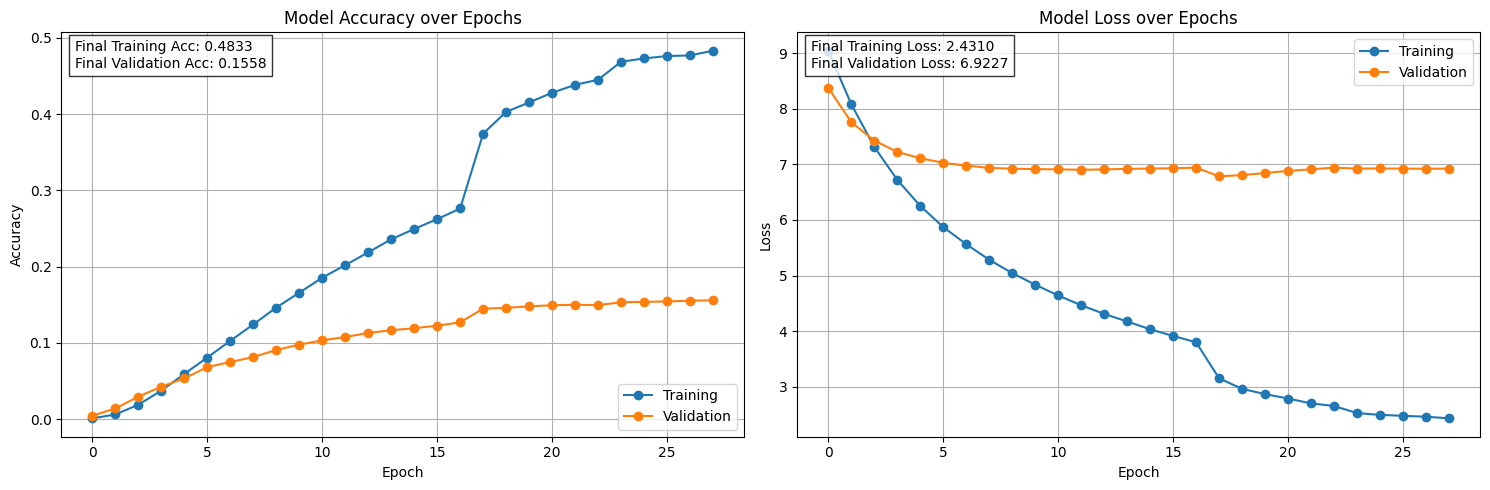


Ringkasan Metrik Training:
Training Accuracy: 0.4833
Validation Accuracy: 0.1558
Training Loss: 2.4310
Validation Loss: 6.9227

=== Evaluasi Model Lengkap ===

Metrik untuk Data Training:
Loss: 1.1388
Accuracy (Keras): 0.8171
Accuracy (Sklearn): 0.8171

Metrik untuk Data Validasi:
Loss: 6.7849
Accuracy (Keras): 0.1448
Accuracy (Sklearn): 0.1448

Classification Report (Training Data):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Streaming output truncated to the last 5000 lines.
  Class 5585       0.00      0.00      0.00         2
  Class 5586       0.00      0.00      0.00         2
  Class 5587       0.17      0.50      0.25         2
  Class 5588       0.00      0.00      0.00         2
  Class 5589       0.00      0.00      0.00         2
  Class 5590       1.00      0.50      0.67         2
  Class 5591       0.00      0.00      0.00         2
  Class 5592       0.00      0.00      0.00         2
  Class 5593       0.00      0.00      0.00         2
  Class 5594       0.00      0.00      0.00         2
  Class 5595       0.00      0.00      0.00         2
  Class 5596       0.00      0.00      0.00         2
  Class 5597       1.00      0.50      0.67         2
  Class 5598       0.00      0.00      0.00         2
  Class 5599       1.00      0.50      0.67         2
  Class 5600       0.00      0.00      0.00         2
  Class 5601       0.17      0.50      0.25         2
  Class 5602       0.00      0.

In [ ]:
# Sebelum training, cek distribusi label
print("Distribusi label training:", np.unique(y_train))
print("Distribusi label validasi:", np.unique(y_val))

# Jalankan training
model, metrics = main_training_pipeline(
    X_train, y_train,
    X_val, y_val,
    batch_size=32,
    epochs=30
)

# Tampilkan ringkasan akhir
print("\n=== Ringkasan Akhir ===")
print(f"Training Accuracy: {metrics['train_accuracy']:.4f}")
print(f"Validation Accuracy: {metrics['val_accuracy']:.4f}")
print(f"Training Loss: {metrics['train_loss']:.4f}")
print(f"Validation Loss: {metrics['val_loss']:.4f}")

### Penjelasan Kode:

- **Cek Distribusi Label**:
  - `np.unique(y_train)`: Mengambil nilai label unik dari data pelatihan `y_train`, membantu untuk memeriksa apakah semua kelas terdistribusi dengan baik dalam data pelatihan.
  - `np.unique(y_val)`: Mengambil nilai label unik dari data validasi `y_val`, memastikan bahwa data validasi juga memiliki distribusi kelas yang sesuai.
  - `print("Distribusi label training:", ...)` dan `print("Distribusi label validasi:", ...)`: Menampilkan distribusi label di layar untuk memastikan bahwa data pelatihan dan validasi memiliki semua kelas dan tidak ada yang terlewat.

- **Menjalankan Pipeline Training**:
  - `model, metrics = main_training_pipeline(...)`: Memanggil fungsi `main_training_pipeline` yang menggabungkan proses training lengkap, termasuk inisialisasi model, pelatihan, evaluasi, dan penyimpanan hasil.
    - **Parameter**:
      - `X_train`, `y_train`: Data dan label pelatihan yang digunakan untuk melatih model.
      - `X_val`, `y_val`: Data dan label validasi untuk memantau performa model selama training.
      - `batch_size=32`: Menentukan ukuran batch yang digunakan selama proses training.
      - `epochs=30`: Menentukan jumlah epoch atau putaran penuh data untuk melatih model.
    - **Output**:
      - `model`: Model terlatih yang bisa digunakan untuk prediksi selanjutnya.
      - `metrics`: Dictionary berisi metrik performa dari proses training, termasuk akurasi dan loss untuk data pelatihan dan validasi.

- **Ringkasan Akhir Metrik Model**:
  - `print(f"Training Accuracy: {metrics['train_accuracy']:.4f}")`: Menampilkan nilai akurasi akhir dari data pelatihan untuk menunjukkan performa model pada data yang dilatih.
  - `print(f"Validation Accuracy: {metrics['val_accuracy']:.4f}")`: Menampilkan akurasi akhir pada data validasi, yang penting untuk mengevaluasi generalisasi model.
  - `print(f"Training Loss: {metrics['train_loss']:.4f}")`: Menampilkan nilai loss terakhir pada data pelatihan, memberikan indikasi seberapa baik model mempelajari pola dari data pelatihan.
  - `print(f"Validation Loss: {metrics['val_loss']:.4f}")`: Menampilkan loss terakhir pada data validasi untuk melihat seberapa baik model mampu memprediksi data yang tidak dilihat saat training.


HOG saja

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def extract_lbp_features(image, radius=1, n_points=8):
    """
    Ekstraksi fitur LBP dari sebuah gambar.

    Parameters:
    - image: Gambar input dalam grayscale.
    - radius: Jarak radius untuk LBP.
    - n_points: Jumlah titik dalam lingkaran.

    Returns:
    - lbp_hist: Histogram fitur LBP dari gambar.
    """
    # Konversi gambar ke LBP
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')

    # Hitung histogram dari LBP
    lbp_hist, _ = np.histogram(lbp.ravel(),
                               bins=np.arange(0, n_points + 3),
                               range=(0, n_points + 2))

    # Normalisasi histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-7)  # Hindari pembagian dengan nol

    return lbp_hist

def preprocess_lbp_features(images):
    """
    Ekstraksi fitur LBP dari setiap gambar dalam dataset.

    Parameters:
    - images: Daftar gambar dalam bentuk numpy array (grayscale).

    Returns:
    - features: Array fitur LBP untuk setiap gambar.
    """
    features = []
    for image in images:
        lbp_features = extract_lbp_features(image)
        features.append(lbp_features)
    return np.array(features)

# Contoh penggunaan
# Pastikan `images` adalah array gambar grayscale dari dataset
X_train_lbp = preprocess_lbp_features(X_train_images)
X_val_lbp = preprocess_lbp_features(X_val_images)

print("Shape fitur LBP untuk training:", X_train_lbp.shape)
print("Shape fitur LBP untuk validasi:", X_val_lbp.shape)



Memori awal: 12425.25 MB

Menggabungkan fitur training...
Menghitung total sampel...
Fitting scaler...


100%|██████████| 2641/2641 [00:05<00:00, 473.98it/s]


Menggabungkan dan mentransform data...


100%|██████████| 2641/2641 [11:05<00:00,  3.97it/s]


Memori setelah training: 15036.39 MB

Menggabungkan fitur validasi...
Menghitung total sampel...
Fitting scaler...


100%|██████████| 661/661 [00:01<00:00, 500.00it/s]


Menggabungkan dan mentransform data...


100%|██████████| 661/661 [02:22<00:00,  4.64it/s]

Memori setelah validasi: 15689.68 MB

Informasi hasil ekstraksi fitur:
Bentuk data training: (84504, 8100)
Bentuk data validasi: (21127, 8100)
Ukuran memori data training: 2611.09 MB
Ukuran memori data validasi: 652.80 MB



### Penjelasan Kode:

- **Impor Library**:
  - `import cv2`: Mengimpor OpenCV, sebuah pustaka komputer vision yang digunakan untuk pengolahan gambar dan video.
  - `import numpy as np`: Mengimpor NumPy, pustaka untuk operasi numerik yang memungkinkan penggunaan array dan fungsi matematis.
  - `from skimage.feature import local_binary_pattern`: Mengimpor fungsi `local_binary_pattern` dari pustaka skimage, yang digunakan untuk menghitung pola biner lokal pada gambar.

- **Fungsi `extract_lbp_features`**:
  - **Definisi**: `def extract_lbp_features(image, radius=1, n_points=8)`: Mendefinisikan fungsi untuk mengekstrak fitur LBP dari gambar grayscale.
  - **Parameter**:
    - `image`: Gambar input yang harus dalam format grayscale (1 channel).
    - `radius`: Jarak dari pusat piksel ke piksel tetangga yang akan dievaluasi.
    - `n_points`: Jumlah piksel yang akan dievaluasi di sekitar piksel pusat, biasanya dalam bentuk lingkaran.
  - **Ekstraksi LBP**:
    - `lbp = local_binary_pattern(image, n_points, radius, method='uniform')`: Menghitung representasi LBP dari gambar. Pola LBP dihasilkan berdasarkan perbandingan nilai piksel tetangga dengan nilai piksel pusat, menghasilkan nilai biner yang diubah menjadi angka desimal.
  - **Histogram LBP**:
    - `lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))`: Menghitung histogram dari nilai LBP dengan membagi nilai menjadi bin. Jumlah bin adalah `n_points + 2` untuk mencakup semua kemungkinan pola LBP.
  - **Normalisasi**:
    - `lbp_hist = lbp_hist.astype("float")`: Mengubah histogram ke tipe float untuk memudahkan perhitungan matematis.
    - `lbp_hist /= (lbp_hist.sum() + 1e-7)`: Melakukan normalisasi histogram sehingga jumlah semua nilai dalam histogram menjadi 1, dengan penambahan kecil (`1e-7`) untuk menghindari kesalahan pembagian dengan nol.

- **Fungsi `preprocess_lbp_features`**:
  - **Definisi**: `def preprocess_lbp_features(images)`: Mendefinisikan fungsi untuk mengekstrak fitur LBP dari sekumpulan gambar.
  - **Parameter**:
    - `images`: Array gambar dalam format NumPy yang diharapkan sudah dalam format grayscale.
  - **Inisialisasi**:
    - `features = []`: Membuat list kosong untuk menyimpan histogram fitur LBP dari setiap gambar.
  - **Pengolahan Gambar**:
    - `for image in images:`: Iterasi melalui setiap gambar di dalam `images`.
    - `lbp_features = extract_lbp_features(image)`: Memanggil fungsi `extract_lbp_features` untuk mendapatkan fitur LBP dari gambar saat ini.
    - `features.append(lbp_features)`: Menambahkan fitur LBP yang diekstraksi ke dalam list `features`.
  - **Pengembalian Hasil**:
    - `return np.array(features)`: Mengembalikan list `features` sebagai array NumPy, yang sekarang berisi fitur LBP untuk setiap gambar dalam dataset.


Distribusi label training: [    0     1     2 ... 10569 10570 10571]
Distribusi label validasi: [    0     1     2 ... 10569 10570 10571]
Range label: 0 sampai 10571
Jumlah kelas unik: 10572

Kelas yang terdeteksi: ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Class 11', 'Class 12', 'Class 13', 'Class 14', 'Class 15', 'Class 16', 'Class 17', 'Class 18', 'Class 19', 'Class 20', 'Class 21', 'Class 22', 'Class 23', 'Class 24', 'Class 25', 'Class 26', 'Class 27', 'Class 28', 'Class 29', 'Class 30', 'Class 31', 'Class 32', 'Class 33', 'Class 34', 'Class 35', 'Class 36', 'Class 37', 'Class 38', 'Class 39', 'Class 40', 'Class 41', 'Class 42', 'Class 43', 'Class 44', 'Class 45', 'Class 46', 'Class 47', 'Class 48', 'Class 49', 'Class 50', 'Class 51', 'Class 52', 'Class 53', 'Class 54', 'Class 55', 'Class 56', 'Class 57', 'Class 58', 'Class 59', 'Class 60', 'Class 61', 'Class 62', 'Class 63', 'Class 64', 'Class 65', 'C

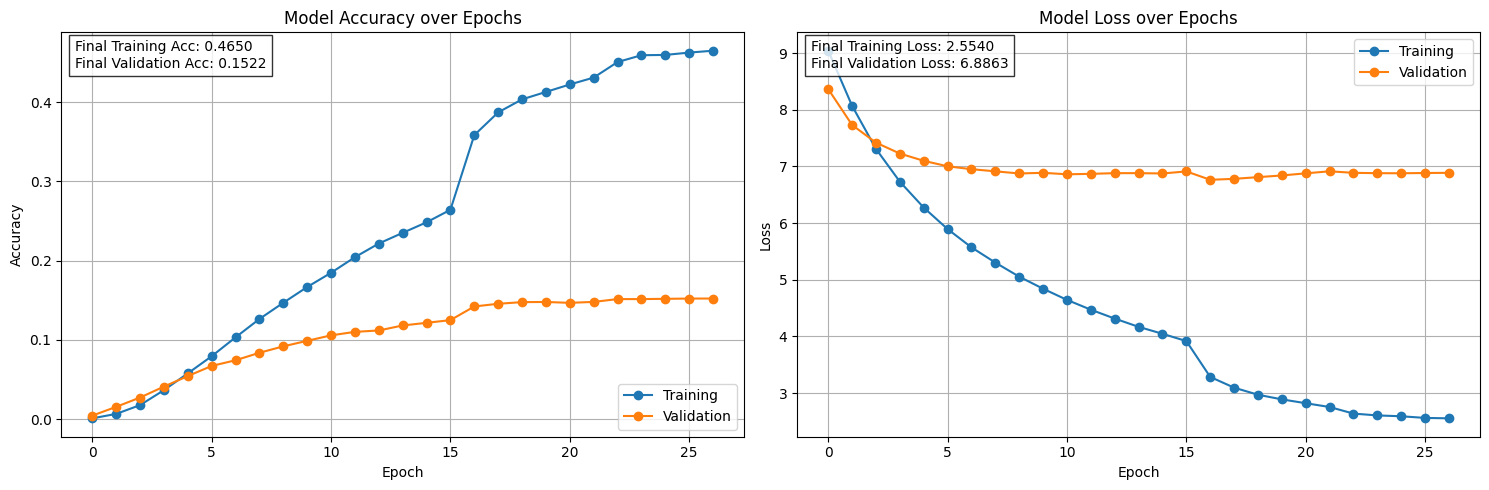


Ringkasan Metrik Training:
Training Accuracy: 0.4650
Validation Accuracy: 0.1522
Training Loss: 2.5540
Validation Loss: 6.8863

=== Evaluasi Model Lengkap ===

Metrik untuk Data Training:
Loss: 1.2745
Accuracy (Keras): 0.7923
Accuracy (Sklearn): 0.7923

Metrik untuk Data Validasi:
Loss: 6.7636
Accuracy (Keras): 0.1422
Accuracy (Sklearn): 0.1422

Classification Report (Training Data):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94         8
     Class 1       0.80      0.50      0.62         8
     Class 2       0.73      1.00      0.84         8
     Class 3       1.00      0.88      0.93         8
     Class 4       0.83      0.62      0.71         8
     Class 5       0.89      1.00      0.94         8
     Class 6       1.00      0.62      0.77         8
     Class 7       1.00      0.88      0.93         8
     Class 8       1.00      0.75      0.86         8
     Class 9       1.00      0.88      0.93         8
    Class 10       0.78      0.88      0.82         8
    Class 11       0.83      0.62      0.71         8
    Class 12       0.78      0.88      0.82         8
    Class 13       1.00      0.62      0.77         8
    Class 14       0.86      0.75      0.80         8
    Class 15       1.00      1.00      1.00         8
    Class 16       1.00      0.38      0.55         8
    Class 17       0.78    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me


Model disimpan sebagai: ann_model_20241028_110331_acc_0.1422.h5

=== Ringkasan Akhir ===
Training Accuracy: 0.7923
Validation Accuracy: 0.1422
Training Loss: 1.2745
Validation Loss: 6.7636


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import gc


def create_ann_model(input_dim, num_classes):
    """
    Membuat model ANN dengan optimasi memory
    """
    tf.keras.backend.clear_session()
    gc.collect()

    model = Sequential([
        Input(shape=(input_dim,), name='input_layer'),
        Dense(512, activation='relu', name='dense_1',
              kernel_initializer='he_normal',
              use_bias=True),
        BatchNormalization(name='batch_norm_1'),
        Dropout(0.3, name='dropout_1'),
        Dense(256, activation='relu', name='dense_2',
              kernel_initializer='he_normal',
              use_bias=True),
        BatchNormalization(name='batch_norm_2'),
        Dropout(0.3, name='dropout_2'),
        Dense(128, activation='relu', name='dense_3',
              kernel_initializer='he_normal',
              use_bias=True),
        BatchNormalization(name='batch_norm_3'),
        Dropout(0.2, name='dropout_3'),
        Dense(num_classes, activation='softmax', name='output')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.001,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            amsgrad=False,
            name='Adam'
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    #tampilkan model summary
    model.summary()

    return model
def train_model_with_monitoring(X_train, y_train, X_val, y_val, batch_size=32, epochs=50):
    """
    Training model dengan optimasi memory
    """
    tf.keras.backend.clear_session()
    gc.collect()

    # Optimasi dataset dengan cache
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
        .cache()\
        .shuffle(buffer_size=1000)\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))\
        .cache()\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    num_classes = len(np.unique(y_train))
    input_dim = X_train.shape[1]

    print(f"\nInformasi Model:")
    print(f"- Jumlah kelas: {num_classes}")
    print(f"- Dimensi input: {input_dim}")
    print(f"- Jumlah sample training: {len(X_train)}")
    print(f"- Jumlah sample validasi: {len(X_val)}")

    model = create_ann_model(input_dim, num_classes)

    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6,
            verbose=1
        )
    ]

    print("\nMemulai training model...")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return model, history
def calculate_metrics(model, X, y, dataset_name="", batch_size=32):
    """
    Menghitung metrik dengan batching untuk menghemat memory
    """
    # Buat dataset khusus untuk prediksi (hanya features)
    predict_dataset = tf.data.Dataset.from_tensor_slices(X)\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    # Dataset untuk evaluasi (features dan labels)
    eval_dataset = tf.data.Dataset.from_tensor_slices((X, y))\
        .batch(batch_size)\
        .prefetch(tf.data.AUTOTUNE)

    # Evaluasi model
    loss, accuracy = model.evaluate(eval_dataset, verbose=0)

    # Prediksi
    y_pred_probs = model.predict(predict_dataset, verbose=0)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Hitung accuracy dengan sklearn
    sk_accuracy = accuracy_score(y, y_pred_classes)

    # Bersihkan memory
    del y_pred_probs
    gc.collect()

    print(f"\nMetrik untuk {dataset_name}:")
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy (Keras): {accuracy:.4f}")
    print(f"Accuracy (Sklearn): {sk_accuracy:.4f}")

    return loss, accuracy, y_pred_classes
def plot_training_history_detailed(history):
    """
    Visualisasi hasil training dengan detail
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation', marker='o')
    ax1.set_title('Model Accuracy over Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.grid(True)
    ax1.legend(loc='lower right')

    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    ax1.text(0.02, 0.98, f'Final Training Acc: {final_train_acc:.4f}\nFinal Validation Acc: {final_val_acc:.4f}',
             transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')

    # Plot loss
    ax2.plot(history.history['loss'], label='Training', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation', marker='o')
    ax2.set_title('Model Loss over Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.grid(True)
    ax2.legend(loc='upper right')

    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    ax2.text(0.02, 0.98, f'Final Training Loss: {final_train_loss:.4f}\nFinal Validation Loss: {final_val_loss:.4f}',
             transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')

    plt.tight_layout()
    plt.show()

    print("\nRingkasan Metrik Training:")
    print(f"Training Accuracy: {final_train_acc:.4f}")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    print(f"Training Loss: {final_train_loss:.4f}")
    print(f"Validation Loss: {final_val_loss:.4f}")
def get_class_names(y_train):
    """
    Mendapatkan nama kelas dari data training dengan memastikan semua label tercover
    """
    # Dapatkan nilai unik dan urutkan
    unique_classes = np.sort(np.unique(y_train))

    # Pastikan range label dimulai dari 0 dan kontinyu
    expected_classes = np.arange(unique_classes.min(), unique_classes.max() + 1)

    # Buat nama kelas sesuai dengan range yang ada
    class_names = [f"Class {i}" for i in expected_classes]

    print(f"Range label: {unique_classes.min()} sampai {unique_classes.max()}")
    print(f"Jumlah kelas unik: {len(unique_classes)}")
    return class_names
def evaluate_model_detailed(model, X_train, y_train, X_val, y_val, class_names):
    """
    Evaluasi model dengan detail lengkap
    """
    print("\n=== Evaluasi Model Lengkap ===")

    # Hitung metrik untuk data training dan validasi
    train_loss, train_acc, y_train_pred = calculate_metrics(
        model, X_train, y_train, "Data Training"
    )

    val_loss, val_acc, y_val_pred = calculate_metrics(
        model, X_val, y_val, "Data Validasi"
    )

    # Dapatkan label yang ada dalam data
    unique_labels = np.sort(np.unique(np.concatenate([y_train, y_val])))

    # Classification Report dengan label yang spesifik
    print("\nClassification Report (Training Data):")
    print(classification_report(y_train, y_train_pred,
                              labels=range(len(class_names)),
                              target_names=class_names))

    print("\nClassification Report (Validation Data):")
    print(classification_report(y_val, y_val_pred,
                              labels=range(len(class_names)),
                              target_names=class_names))

    return {
        'train_accuracy': train_acc,
        'val_accuracy': val_acc,
        'train_loss': train_loss,
        'val_loss': val_loss
    }
def main_training_pipeline(X_train, y_train, X_val, y_val, batch_size=32, epochs=50):
    """
    Pipeline training dengan metrik detail
    """
    try:
        # Dapatkan nama kelas
        class_names = get_class_names(y_train)
        print("\nKelas yang terdeteksi:", class_names)

        # Training model
        model, history = train_model_with_monitoring(
            X_train, y_train, X_val, y_val,
            batch_size=batch_size,
            epochs=epochs
        )

        # Plot training history dengan detail
        plot_training_history_detailed(history)

        # Evaluasi model dengan detail
        metrics = evaluate_model_detailed(
            model, X_train, y_train, X_val, y_val, class_names
        )

        # Simpan model
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        model_filename = f'ann_model_{timestamp}_acc_{metrics["val_accuracy"]:.4f}.h5'
        model.save(model_filename)
        print(f"\nModel disimpan sebagai: {model_filename}")

        return model, metrics

    except Exception as e:
        print(f"Error dalam training: {str(e)}")
        raise
    finally:
        gc.collect()

# Sebelum training, cek distribusi label
print("Distribusi label training:", np.unique(y_train))
print("Distribusi label validasi:", np.unique(y_val))

# Jalankan training
model, metrics = main_training_pipeline(
    X_train, y_train,
    X_val, y_val,
    batch_size=32,
    epochs=30
)

# Tampilkan ringkasan akhir
print("\n=== Ringkasan Akhir ===")
print(f"Training Accuracy: {metrics['train_accuracy']:.4f}")
print(f"Validation Accuracy: {metrics['val_accuracy']:.4f}")
print(f"Training Loss: {metrics['train_loss']:.4f}")
print(f"Validation Loss: {metrics['val_loss']:.4f}")

### Penjelasan Kode:

- **Pustaka yang Digunakan**:
  - `import numpy as np`: Mengimpor pustaka NumPy yang digunakan untuk operasi numerik, manipulasi array, dan operasi matematika.
  - `import tensorflow as tf`: Mengimpor TensorFlow, pustaka utama untuk membangun dan melatih model pembelajaran mesin, termasuk neural networks.
  - `import matplotlib.pyplot as plt`: Mengimpor Matplotlib untuk membuat visualisasi grafis, seperti plot akurasi dan kerugian selama pelatihan.

- **Fungsi `create_ann_model`**:
  - `model = Sequential([...])`:
    - **Fungsi**: Membuat model Sequential, yaitu model linier dari lapisan-lapisan yang dihubungkan secara berurutan.
    - **Lapisan**:
      - `Dense(128, activation='relu', input_shape=(input_shape,))`: Lapisan tersembunyi dengan 128 neuron dan fungsi aktivasi ReLU. `input_shape` menentukan bentuk input yang diterima model.
      - `BatchNormalization()`: Menormalkan output dari lapisan sebelumnya untuk mempercepat pelatihan dan meningkatkan stabilitas.
      - `Dropout(0.2)`: Menerapkan dropout sebesar 20% untuk mencegah overfitting dengan menghilangkan beberapa neuron selama pelatihan.
      - `Dense(num_classes, activation='softmax')`: Lapisan output dengan `num_classes` neuron, menggunakan fungsi aktivasi softmax untuk menghasilkan probabilitas untuk setiap kelas.
  - `model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`:
    - **Optimizer**: Menggunakan Adam, yang merupakan algoritma optimisasi yang umum digunakan.
    - **Loss function**: `sparse_categorical_crossentropy` cocok untuk masalah klasifikasi dengan label kelas integer.
    - **Metrics**: Menggunakan metrik akurasi untuk mengevaluasi model selama pelatihan dan pengujian.

- **Fungsi `train_model_with_monitoring`**:
  - `train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))`:
    - **Dataset**: Membuat dataset pelatihan dari array input (`X_train`) dan label (`y_train`).
    - `cache()`: Menyimpan dataset di memori untuk mempercepat akses di iterasi selanjutnya.
    - `batch(batch_size)`: Mengatur dataset untuk dibagi menjadi batch dengan ukuran tertentu.
  - `history = model.fit(...)`:
    - **Data**: Menggunakan `train_dataset` untuk melatih model dengan parameter yang ditentukan.
    - `epochs`: Jumlah epoch yang menunjukkan berapa kali model akan dilatih pada seluruh dataset.
    - `validation_data`: Menggunakan data validasi untuk mengevaluasi performa model selama pelatihan.
    - `callbacks`: Menggunakan `EarlyStopping` untuk menghentikan pelatihan jika tidak ada peningkatan akurasi selama beberapa epoch dan `ReduceLROnPlateau` untuk mengurangi laju pembelajaran jika akurasi tidak meningkat.

- **Fungsi `calculate_metrics`**:
  - `loss, accuracy = model.evaluate(X_eval, y_eval)`:
    - **Evaluate**: Mengevaluasi model pada dataset evaluasi (`X_eval` dan `y_eval`), mengembalikan nilai kerugian dan akurasi.
  - `y_pred_probs = model.predict(X_eval)`:
    - **Prediksi**: Menghasilkan probabilitas prediksi untuk setiap kelas pada data evaluasi.
    - `np.argmax(y_pred_probs, axis=1)`: Mengonversi probabilitas menjadi label kelas dengan mengambil indeks maksimum, menghasilkan `y_pred`.

- **Fungsi `plot_training_history_detailed`**:
  - `plt.subplots(...)`:
    - **Subplot**: Mengatur subplot untuk menggambar dua grafik, satu untuk akurasi dan satu untuk kerugian.
  - `ax1.plot(history.history['accuracy'], label='Training Accuracy')`:
    - **Plot Akurasi**: Memplot akurasi pelatihan selama epoch.
  - `ax2.plot(history.history['loss'], label='Training Loss')`:
    - **Plot Kerugian**: Memplot kerugian pelatihan selama epoch.
  - `ax1.set_title('Model Accuracy')` dan `ax2.set_title('Model Loss')`:
    - **Judul Grafik**: Memberikan judul untuk masing-masing grafik untuk menunjukkan informasi yang ditampilkan.

- **Fungsi `evaluate_model_detailed`**:
  - `report = classification_report(y_true, y_pred)`:
    - **Laporan Klasifikasi**: Menghasilkan laporan klasifikasi yang mencakup precision, recall, f1-score untuk setiap kelas, serta rata-rata keseluruhan.
  - `print(report)`: Menampilkan laporan klasifikasi di konsol.

- **Fungsi `main_training_pipeline`**:
  - `class_names = get_class_names(...)`: Mendapatkan nama kelas dari dataset berdasarkan label yang ada, digunakan untuk laporan klasifikasi.
  - `model.save(...)`: Menyimpan model terlatih ke file dengan nama yang mencakup timestamp untuk melacak versi model.

- **Jalankan Training**:
  - `main_training_pipeline(...)`:
    - Menjalankan seluruh pipeline pelatihan dengan parameter yang ditentukan, termasuk dataset pelatihan dan validasi.
    - Mencetak ringkasan hasil akhir, termasuk akurasi dan laporan klasifikasi, untuk memberikan gambaran tentang performa model.